In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 204 data

### Reading the files and extracting relevant information:

In [3]:
plant = "A"
xls_files = {}


xls = pd.ExcelFile(
    f"../../../data/raw/204/EMBRAPII hubIC IACC CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)

xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Plant: ", plant, xls.sheet_names)

Plant:  A ['INSTRUÇÕES', '176', '102']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('A', '176', array(['', 'CPVARIRS'], dtype=object)),
 ('A', '102', array(['', 'CPIV32'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'': 2})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 1472 non-null   object        
 1   (Data, Produção)                             1472 non-null   datetime64[ns]
 2   (Horário, Produção)                          0 non-null      float64       
 3   (Data, Medida)                               0 non-null      float64       
 4   (Horário, Medida)                            0 non-null      float64       
 5   (Tipo de cimento, Unnamed: 6_level_2)        1472 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  0 non-null      float64       
 7   (Obs., Unnamed: 8_level_2)                   0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 92.6+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 81.1 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                1456 non-null   float64
 1   MgO                1458 non-null   float64
 2   Na2O               1458 non-null   float64
 3   Al2O3              1458 non-null   float64
 4   SiO2               1458 non-null   float64
 5   SO3                1461 non-null   float64
 6   K2O                1458 non-null   float64
 7   TiO2               0 non-null      float64
 8   Fe2O3              1458 non-null   float64
 9   Perda ao fogo      1470 non-null   float64
 10  Resíduo insolúvel  1470 non-null   float64
 11  Obs.               0 non-null      float64
dtypes: float64(12)
memory usage: 138.9 KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            1472 non-null   float64
 1   (Unnamed: 137_level_1, #200)              1472 non-null   float64
 2   (Unnamed: 138_level_1, #325)              1472 non-null   float64
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(6)
memory usage: 69.5 KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1472 non-null   float64
 1   (Tempo de pega, Fim)              1472 non-null   float64
 2   (Resistência à compressão, 1 d)   804 non-null    float64
 3   (Resistência à compressão, 3 d)   1467 non-null   float64
 4   (Resistência à compressão, 7 d)   1450 non-null   object 
 5   (Resistência à compressão, 28 d)  1462 non-null   float64
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  1480 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  1472 non-null   object 
 2   (Data, Produção)                                              1472 non-null   object 
 3   (Horário, Produção)                                           0 non-null      object 
 4   (Data, Medida)                                                0 non-null      object 
 5   (Horário, Medida)                                             0 non-null      object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         1472 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   0 non-n

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# # Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("Fibro", "Fibrocimento")


df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(1472, 26)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant                  City       Date    CaO   MgO  Na2O  Al2O3   SiO2  \
0     A  Nova Santa Rita - RS 2020-01-02  54.23  6.39  0.25   6.13  21.20   
1     A  Nova Santa Rita - RS 2020-01-03  53.80  6.24  0.24   6.31  21.76   
2     A  Nova Santa Rita - RS 2020-01-06  54.59  6.49  0.25   6.13  21.51   
3     A  Nova Santa Rita - RS 2020-01-07  53.09  5.88  0.24   6.38  21.41   
4     A  Nova Santa Rita - RS 2020-01-08  52.94  5.84  0.24   6.53  22.23   

    SO3   K2O  ...  #325  #400  Specific Gravity  Final setting time  \
0  3.91  1.70  ...  0.64   NaN               NaN               210.0   
1  3.88  1.67  ...  0.87   NaN               NaN               235.0   
2  3.26  1.65  ...  0.66   NaN               NaN               225.0   
3  3.94  1.60  ...  0.90   NaN               NaN               240.0   
4  4.32  1.56  ...  0.71   NaN               NaN               235.0   

   Initial setting time   CS1   CS3   CS7  CS28  Cement_Type  
0                 310.0  24.7  27.9  35.8  40.0   CPV ARI RS  
1                 340.0  23.0  26.3  34.9  40.7   CPV ARI RS  
2                 310.0  23.2  31.3  33.7  39.4   CPV ARI RS  
3                 320.0  23.8  29.3  34.8  39.7   CPV ARI RS  
4                 335.0  22.3  30.0  37.0  38.2   CPV ARI RS  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant                  City       Date    CaO   MgO  Na2O  Al2O3  SiO2  \
1467     A  Nova Santa Rita - RS 2023-06-26  35.00  4.46  0.27  12.06  36.5   
1468     A  Nova Santa Rita - RS 2023-06-27  33.32  4.01  0.30  12.07  37.5   
1469     A  Nova Santa Rita - RS 2023-06-28  34.05  4.14  0.29  12.25  37.3   
1470     A  Nova Santa Rita - RS 2023-06-29  34.29  4.29  0.30  12.15  36.9   
1471     A  Nova Santa Rita - RS 2023-06-30  33.10  4.28  0.24  12.91  37.5   

       SO3   K2O  ...  #325  #400  Specific Gravity  Final setting time  \
1467  2.43  0.27  ...  2.25   NaN               NaN               400.0   
1468  2.58  0.30  ...  2.09   NaN               NaN               400.0   
1469  2.43  0.29  ...  2.16   NaN               NaN               425.0   
1470  2.39  0.30  ...  2.19   NaN               NaN               415.0   
1471  2.36  0.24  ...  2.19   NaN               NaN               430.0   

      Initial setting time  CS1   CS3   CS7  CS28  Cement_Type  
1467                 465.0  NaN  17.7  21.0  33.2      CPIV 32  
1468                 465.0  NaN  17.2  22.0  33.0      CPIV 32  
1469                 500.0  NaN  18.4  21.4  32.7      CPIV 32  
1470                 500.0  NaN  17.9  21.0  34.0      CPIV 32  
1471                 510.0  NaN  18.0  22.2  33.2      CPIV 32  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 1472 non-null   object        
 1   City                  1472 non-null   object        
 2   Date                  1472 non-null   datetime64[ns]
 3   CaO                   1456 non-null   float64       
 4   MgO                   1458 non-null   float64       
 5   Na2O                  1458 non-null   float64       
 6   Al2O3                 1458 non-null   float64       
 7   SiO2                  1458 non-null   float64       
 8   SO3                   1461 non-null   float64       
 9   K2O                   1458 non-null   float64       
 10  TiO2                  0 non-null      float64       
 11  Fe2O3                 1458 non-null   float64       
 12  Loss on Ignition      1470 non-null   float64       
 13  Insoluble Residue 

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           22
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                    1472  2021-10-23 09:12:43.043478528   
CaO                   1456.0                      45.814677   
MgO                   1458.0                       5.443333   
Na2O                  1458.0                       0.234794   
Al2O3                 1458.0                       8.699808   
SiO2                  1458.0                      28.152709   
SO3                   1461.0                       3.351595   
K2O                   1458.0                       0.885267   
TiO2                     0.0                            NaN   
Fe2O3                 1458.0                       2.873073   
Loss on Ignition      1470.0                       3.704156   
Insoluble Residue     1470.0                      22.553776   
Blaine                1472.0                    4709.836957   
#200                  1472.0                       0.250727   
#325                  1472.0                       1.447296   
#400                     0.0                            NaN   
Specific Gravity         0.0                            NaN   
Final setting time    1472.0                      265.73981   
Initial setting time  1472.0                     342.625679   
CS1                    804.0                      22.076281   
CS3                   1467.0                      26.431097   
CS7                   1450.0                      31.106634   
CS28                  1462.0                      41.157791   

                                      min                  25%  \
Date                  2020-01-02 00:00:00  2020-12-15 18:00:00   
CaO                                 20.18                36.91   
MgO                                   0.0                 4.34   
Na2O                                  0.0                 0.21   
Al2O3                                 4.4                 5.56   
SiO2                                 2.98                22.09   
SO3                                  1.75                 2.37   
K2O                                   0.0                 0.27   
TiO2                                  NaN                  NaN   
Fe2O3                                 0.0                 2.59   
Loss on Ignition                      1.9                 3.28   
Insoluble Residue                     0.0              11.2625   
Blaine                                0.0               4490.0   
#200                                  0.0                 0.08   
#325                                  0.0                 0.57   
#400                                  NaN                  NaN   
Specific Gravity                      NaN                  NaN   
Final setting time                    0.0                225.0   
Initial setting time                  0.0                295.0   
CS1                                  15.0                 20.4   
CS3                                  12.4                 18.4   
CS7                                  17.1                 22.8   
CS28                                  0.0                 35.2   

                                      50%                  75%  \
Date                  2021-11-09 00:00:00  2022-08-24 06:00:00   
CaO                                 50.88                53.36   
MgO                                  5.34                 6.57   
Na2O                                 0.24                 0.27   
Al2O3                                6.24              12.2475   
SiO2                                23.96                35.51   
SO3                                  3.84                 4.21   
K2O                                  1.24                 1.44   
TiO2                                  NaN                  NaN   
Fe2O3                                 2.8                 3.13   
Loss on Ignition                    3.695                 4.18   
Insoluble Residue                  15.125                35.73   
Blaine                             4770.0               4910.0   
#

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                   top  freq  \
Plant        1472      1                     A  1472   
City         1472      1  Nova Santa Rita - RS  1472   
Date         1472    NaN                   NaN   NaN   
Cement_Type  1472      2            CPV ARI RS   814   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2021-10-23 09:12:43.043478528  2020-01-02 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2020-12-15 18:00:00  2021-11-09 00:00:00  2022-08-24 06:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-06-30 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['A'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CPV ARI RS', 'CPIV 32'], dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Nova Santa Rita - RS'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
A    1472
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CPV ARI RS    814
CPIV 32       658
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Nova Santa Rita - RS    1472
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_2149120/3223151730.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


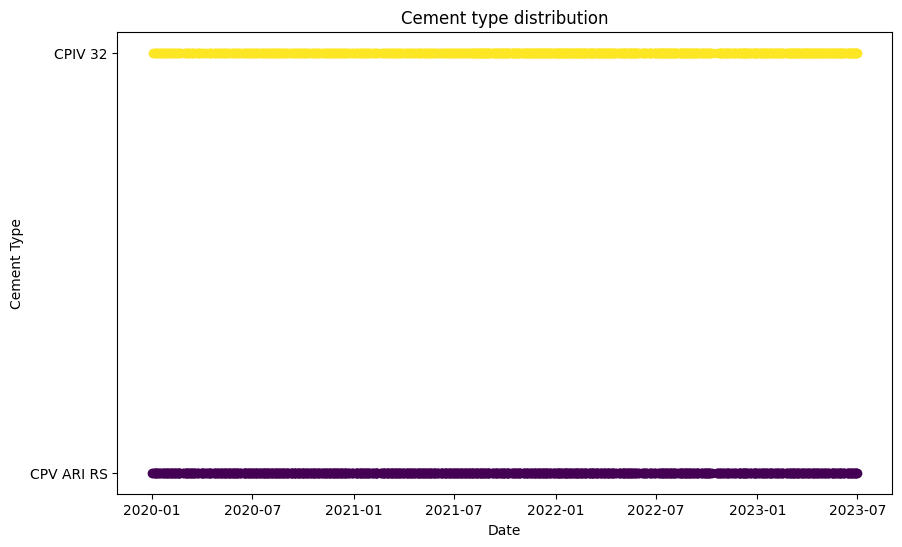

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

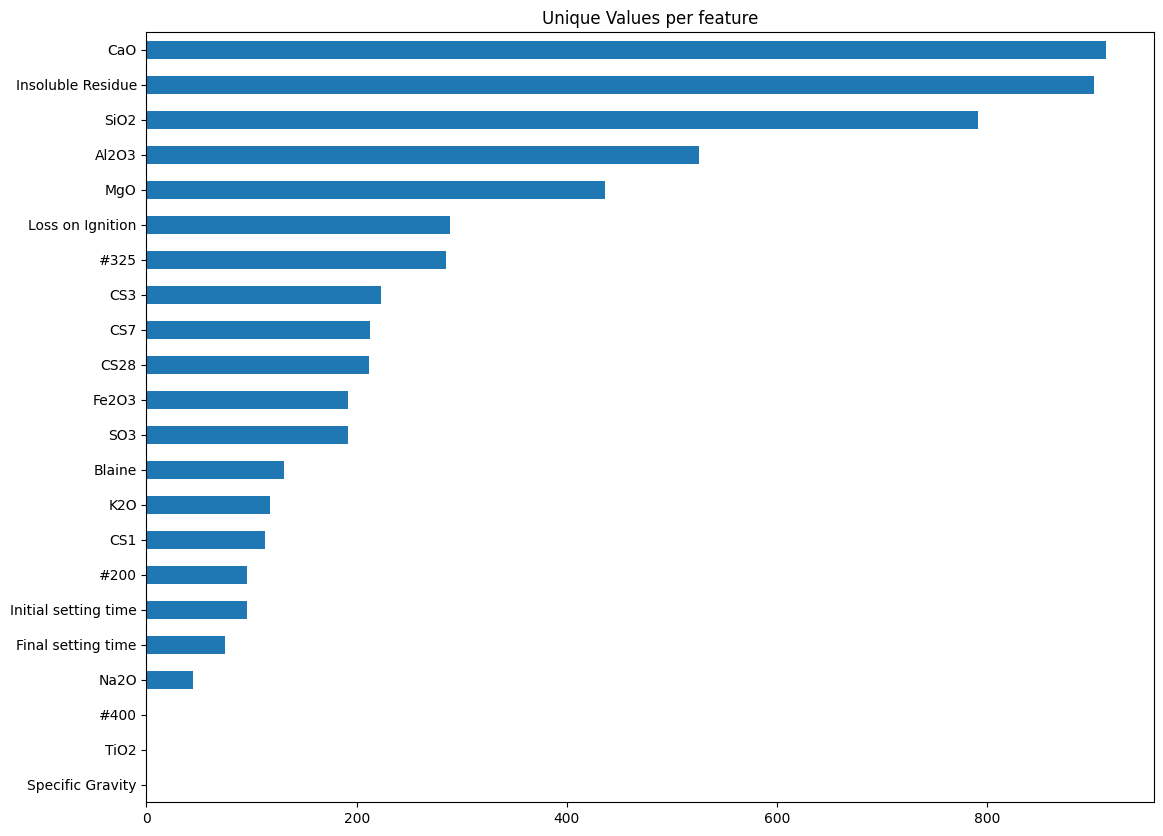

<IPython.core.display.Javascript object>

In [39]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

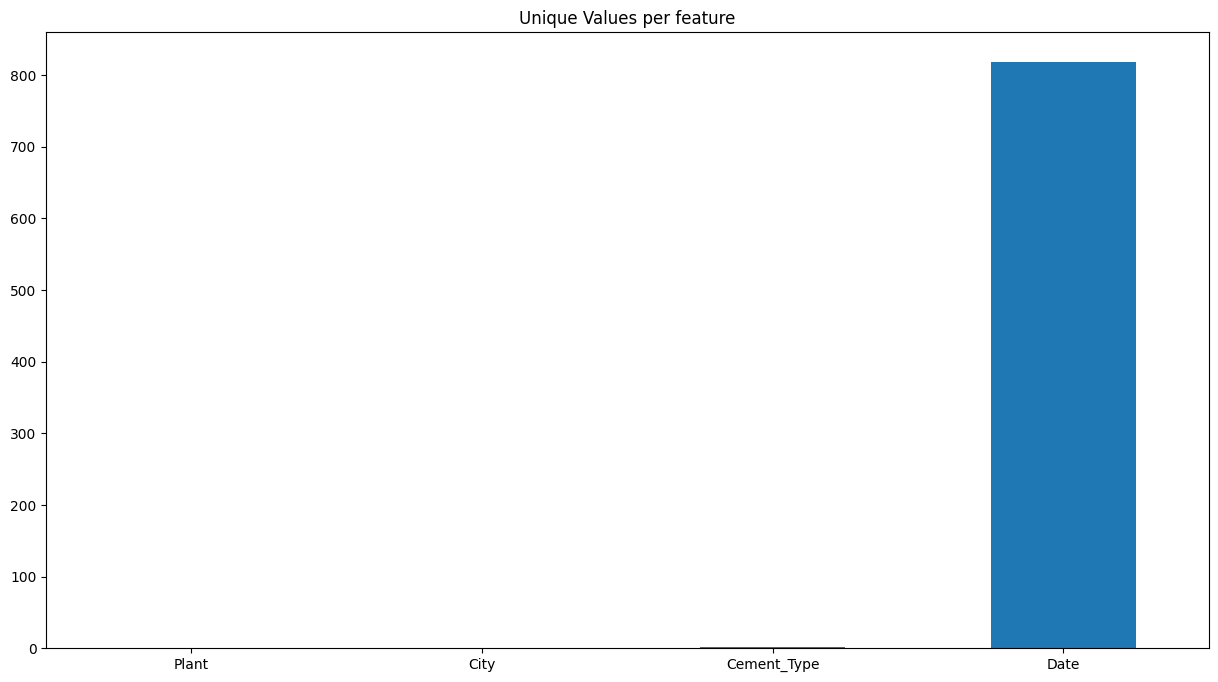

<IPython.core.display.Javascript object>

In [40]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

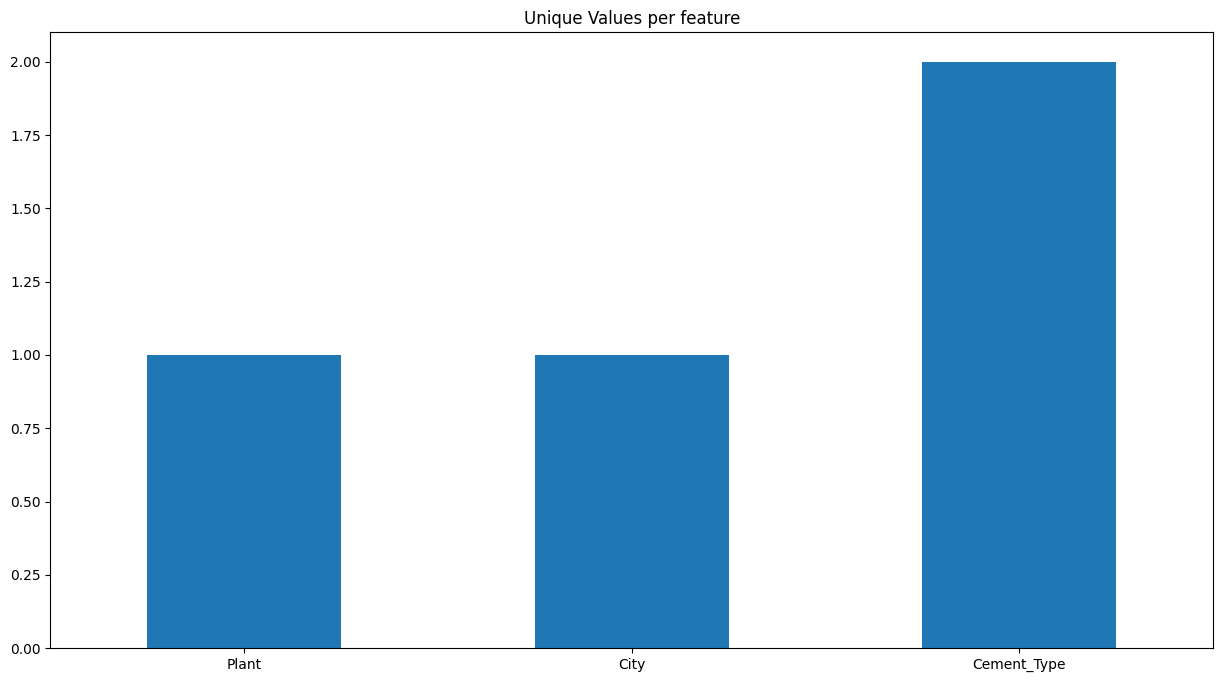

<IPython.core.display.Javascript object>

In [41]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [42]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 17 variables with missing values from a total of 26


<IPython.core.display.Javascript object>

In [43]:
df.isna().any()

Plant                   False
City                    False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                  False
#200                    False
#325                    False
#400                     True
Specific Gravity         True
Final setting time      False
Initial setting time    False
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [44]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [45]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 26 artists>

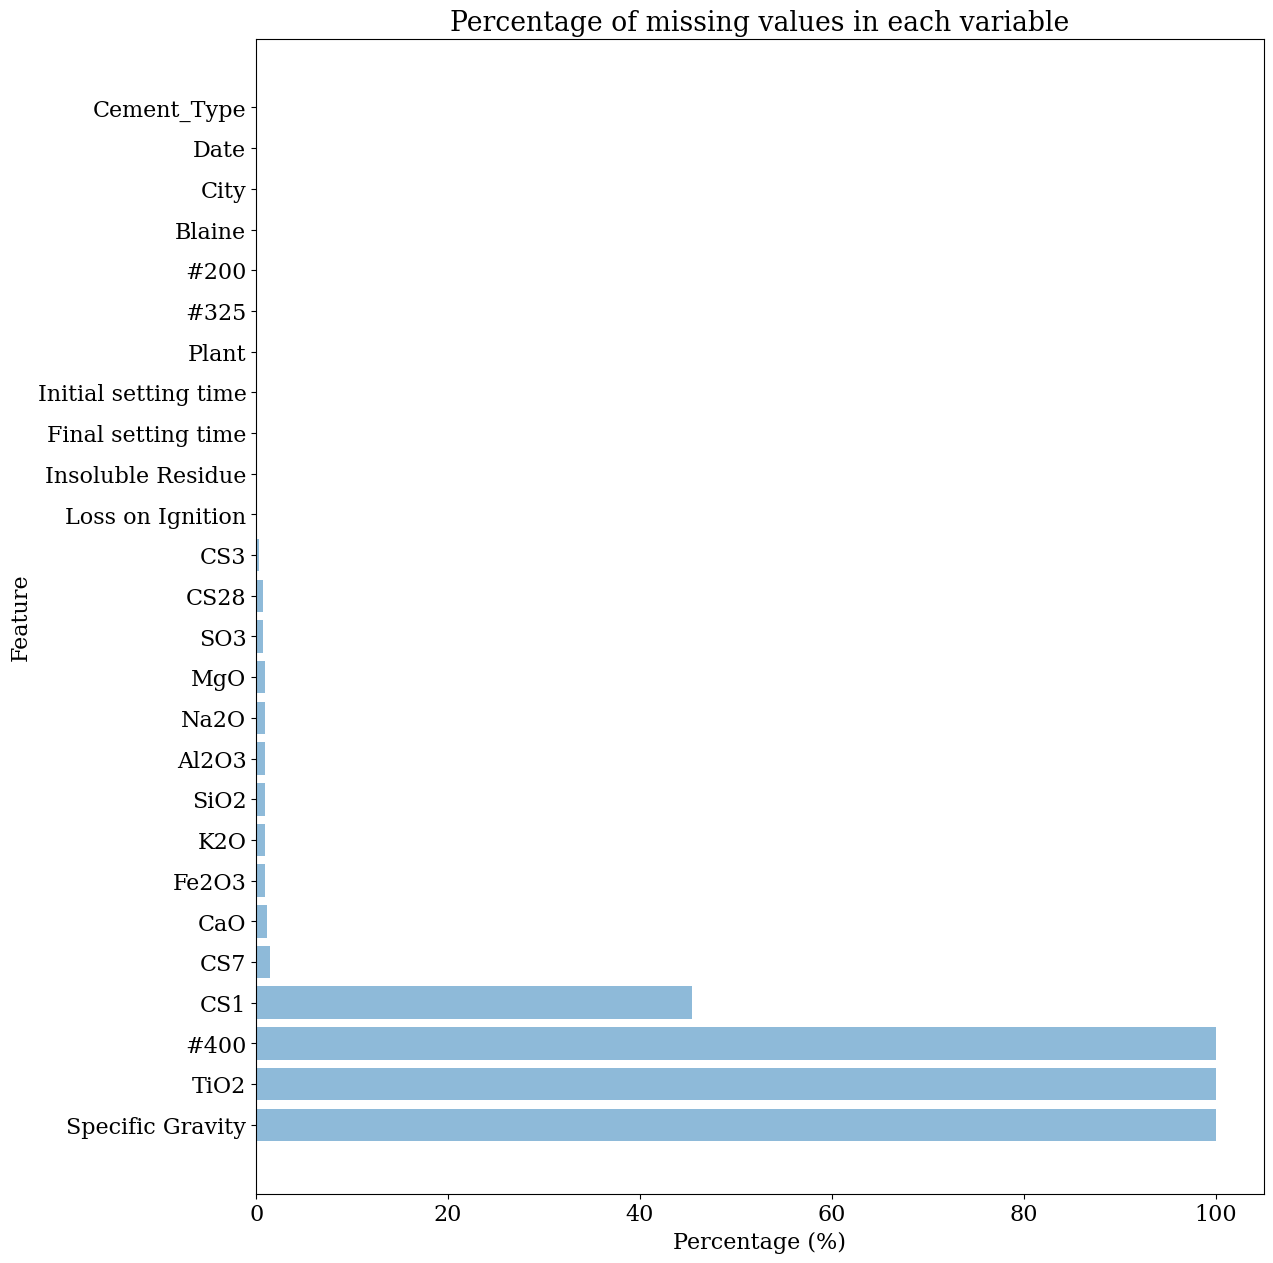

<IPython.core.display.Javascript object>

In [46]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [47]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [48]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

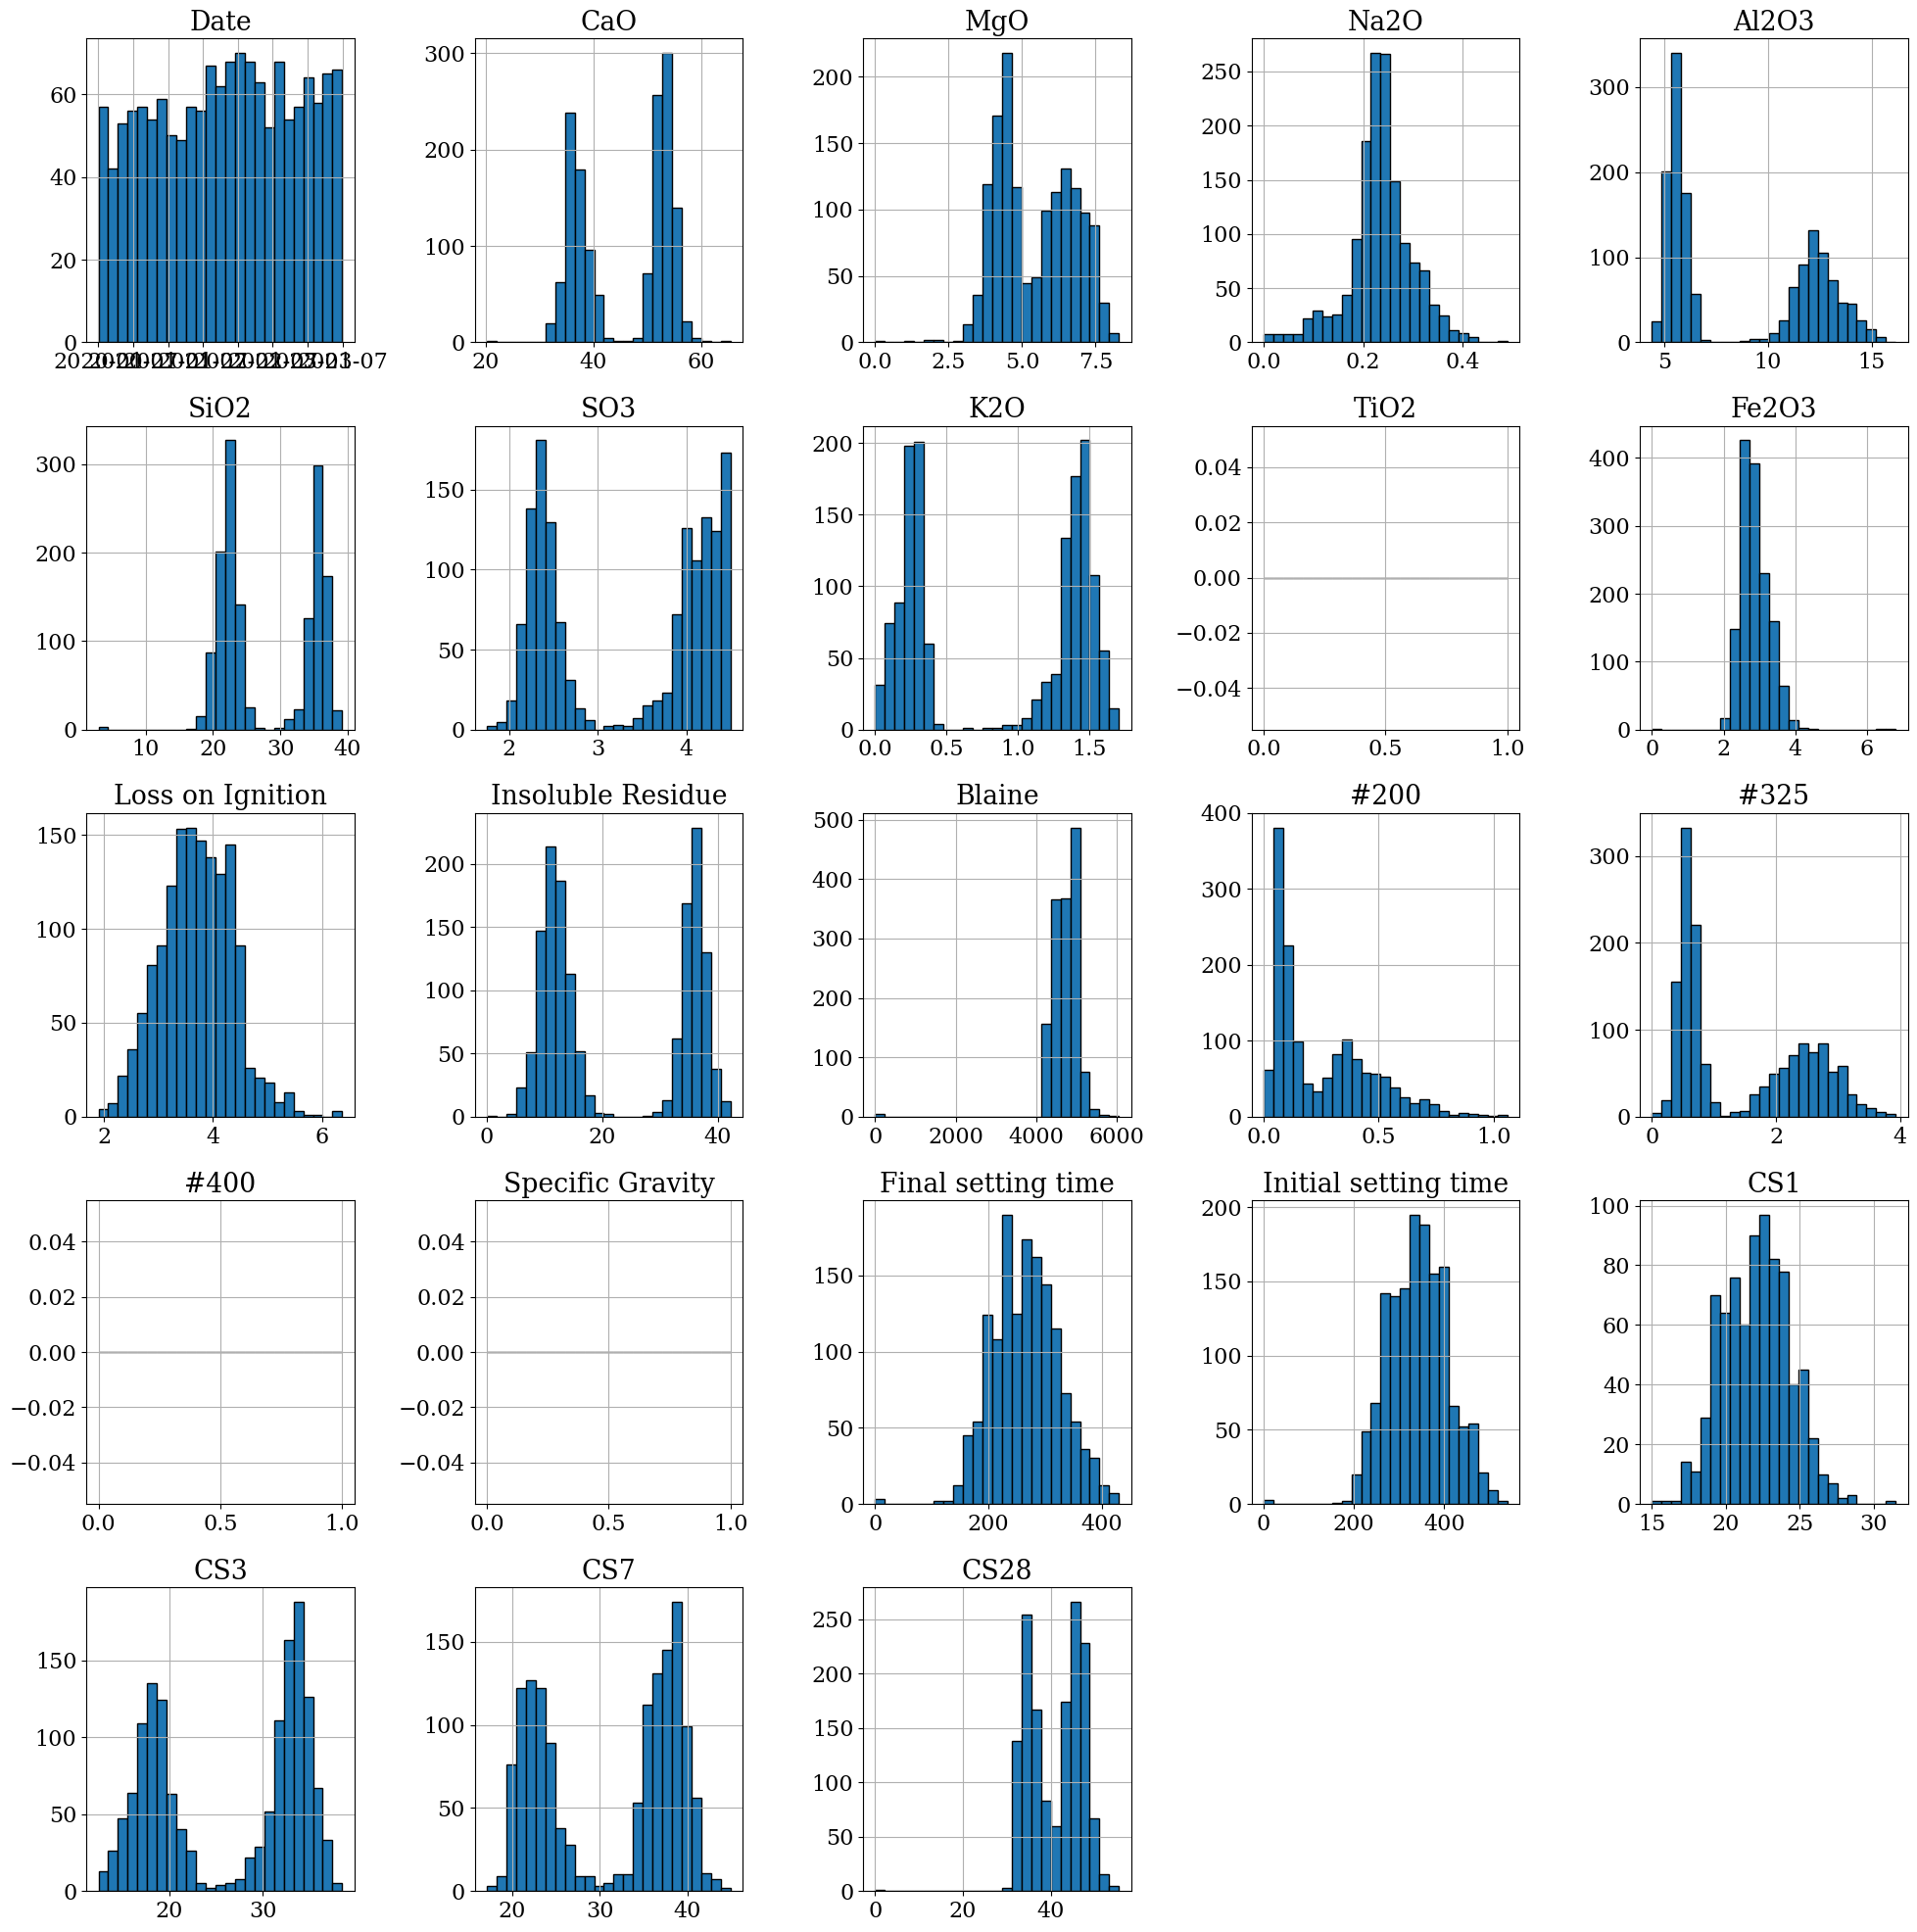

<IPython.core.display.Javascript object>

In [49]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

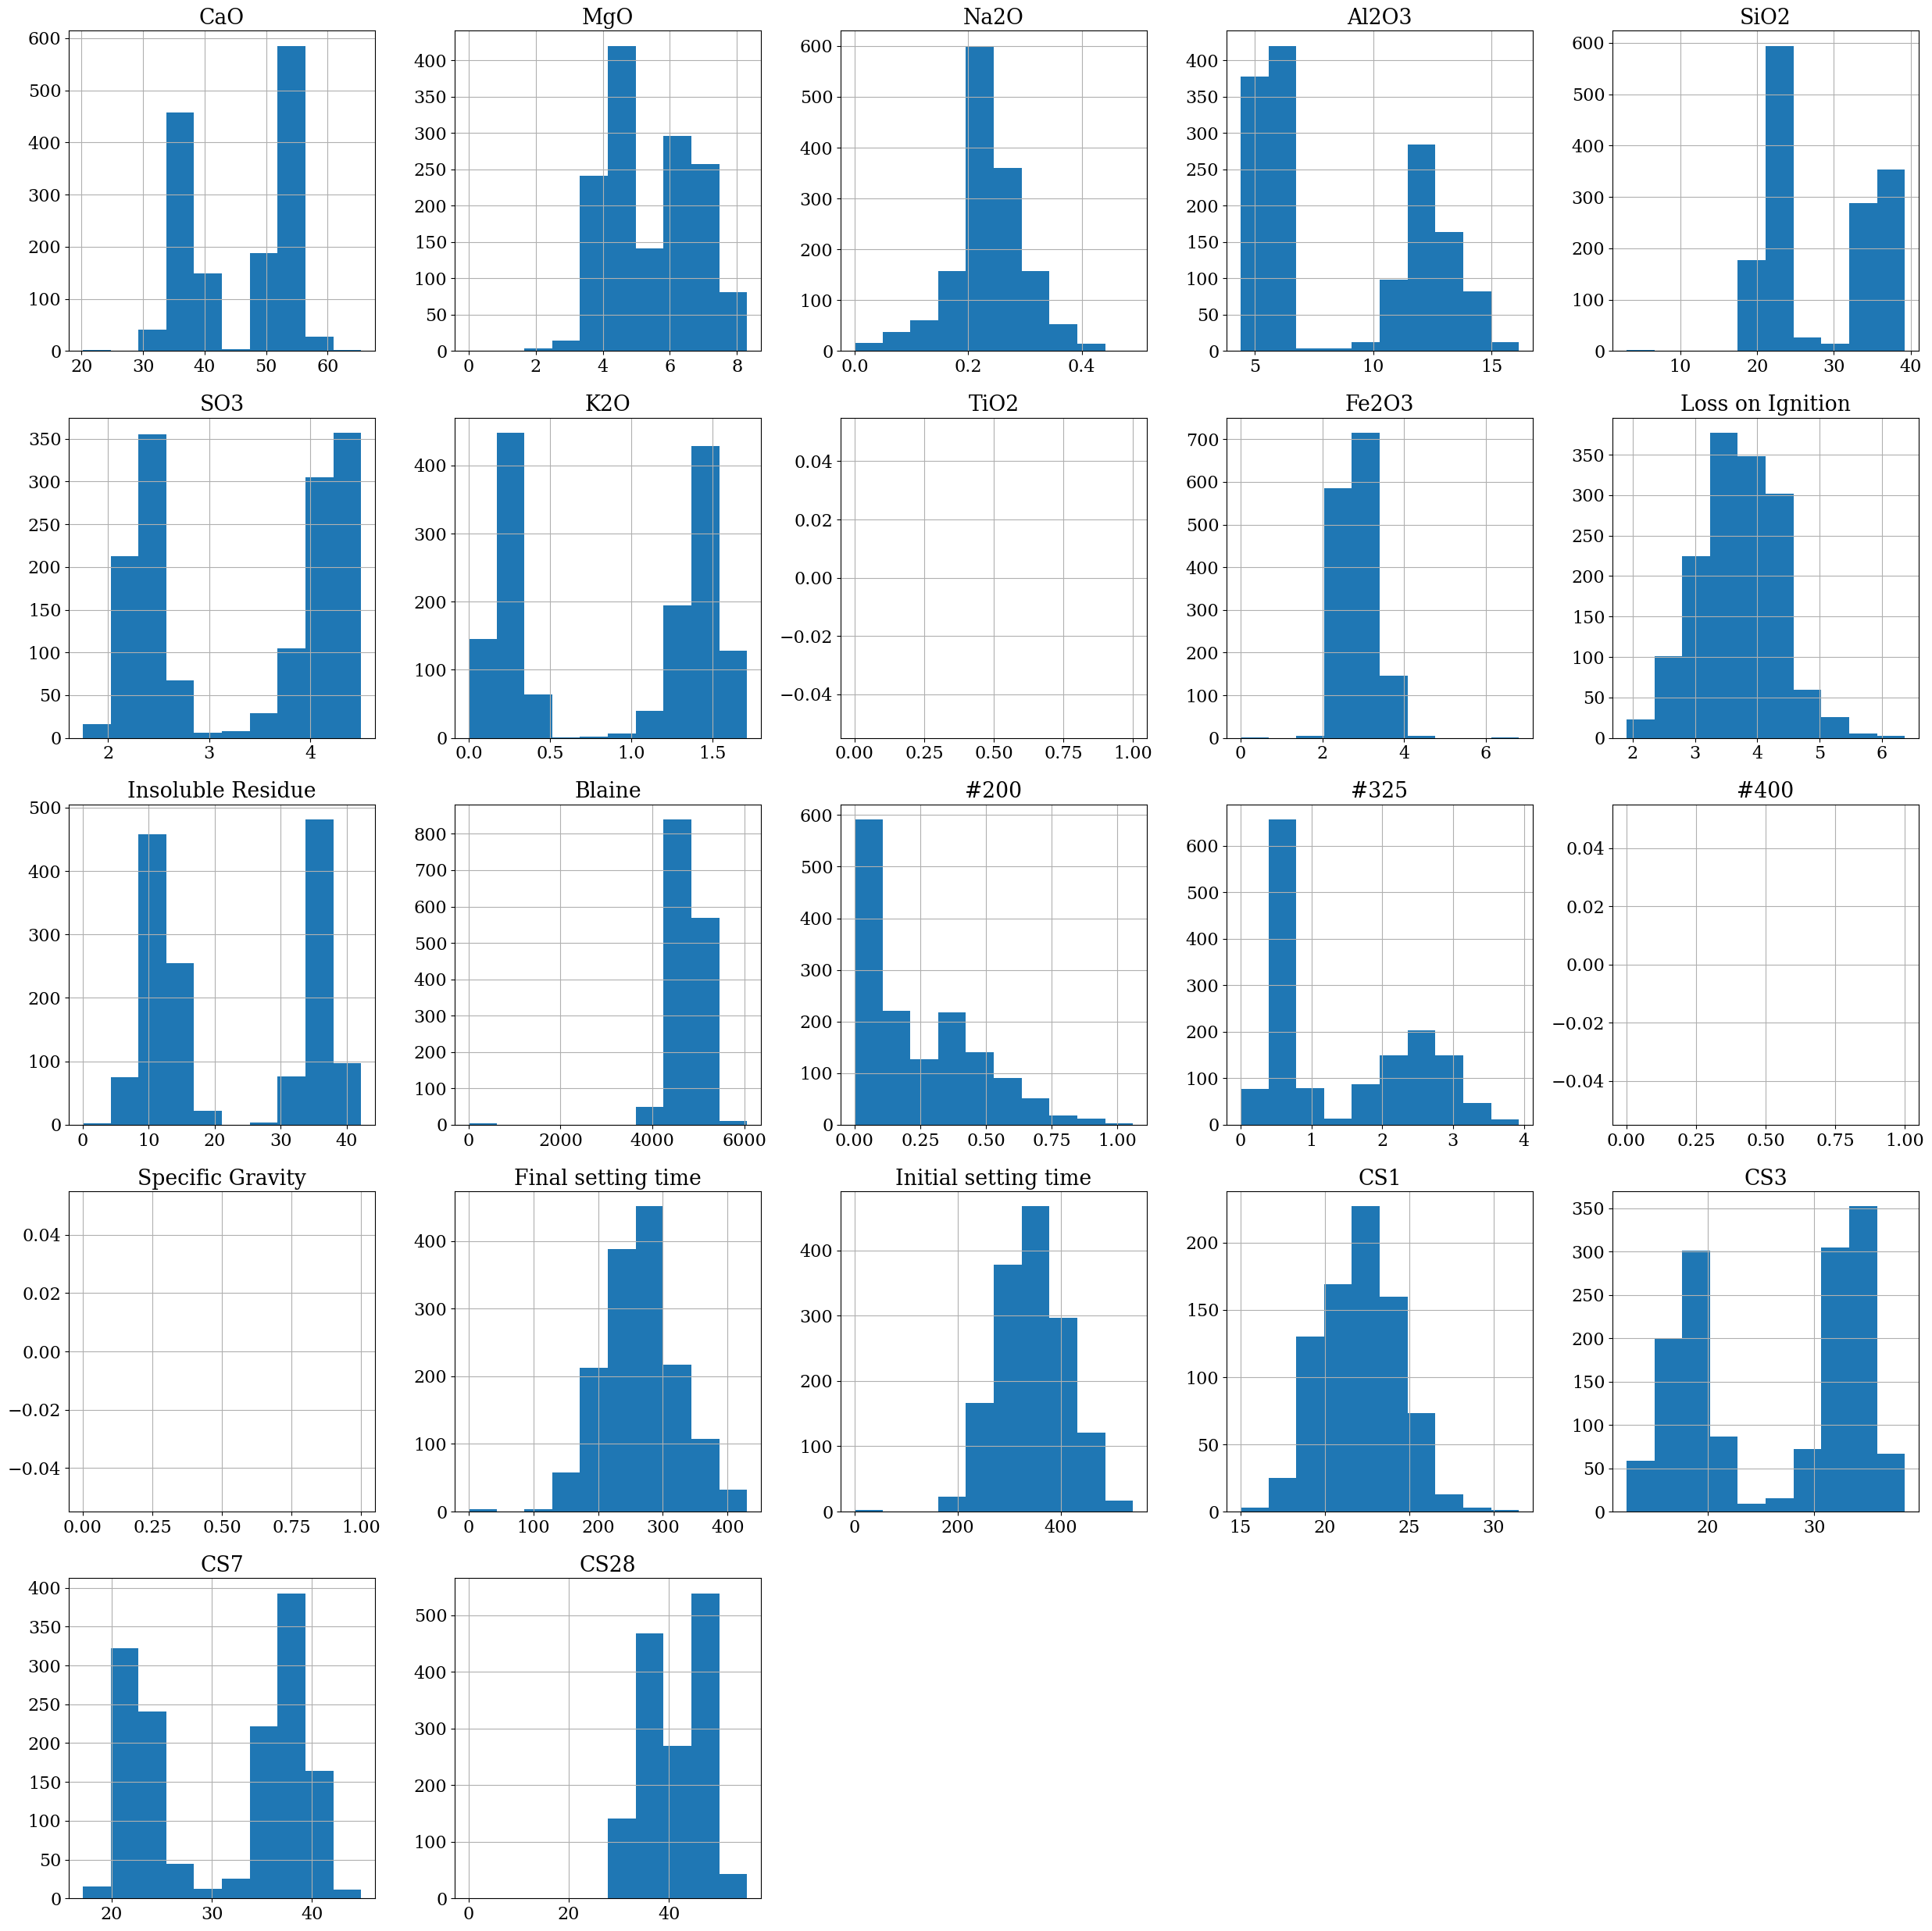

<IPython.core.display.Javascript object>

In [50]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

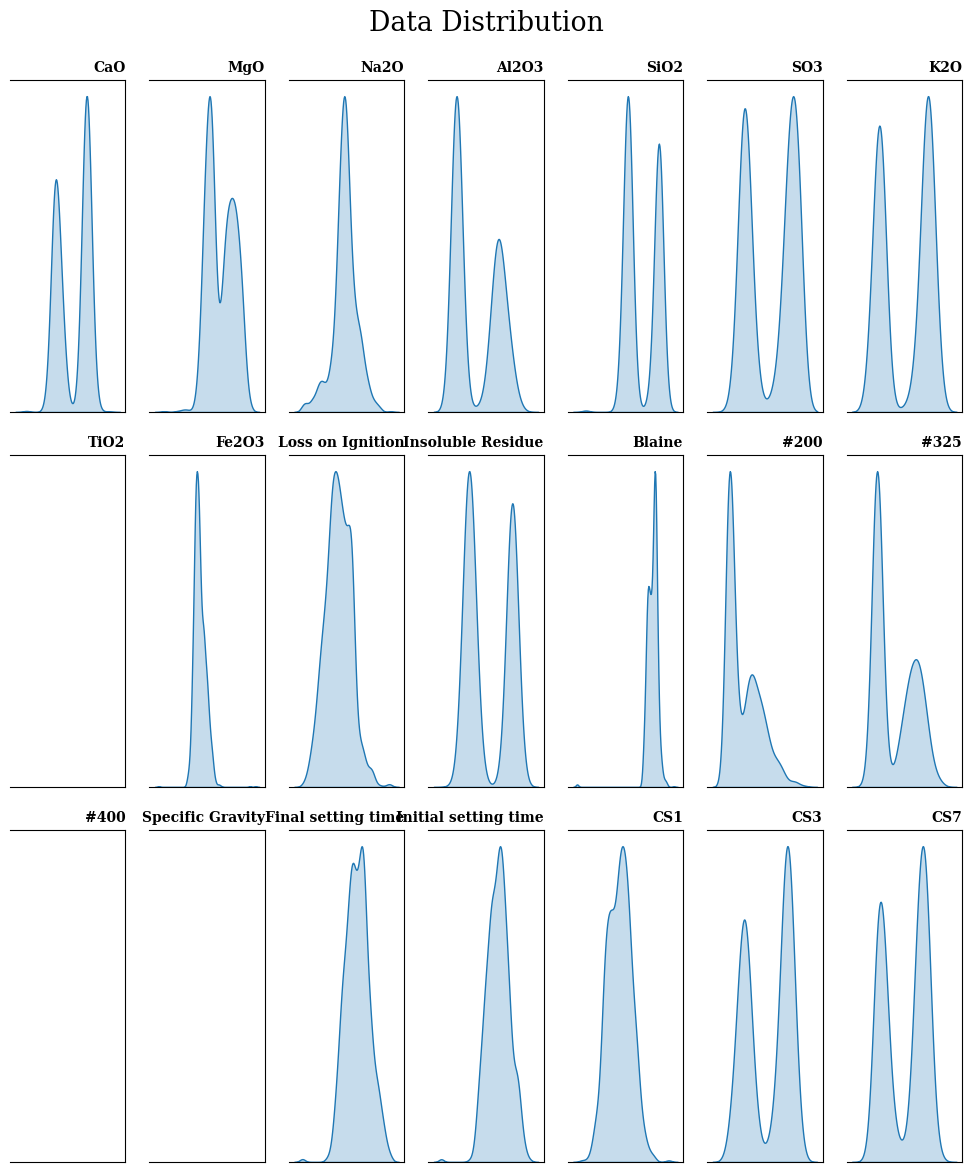

<IPython.core.display.Javascript object>

In [51]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

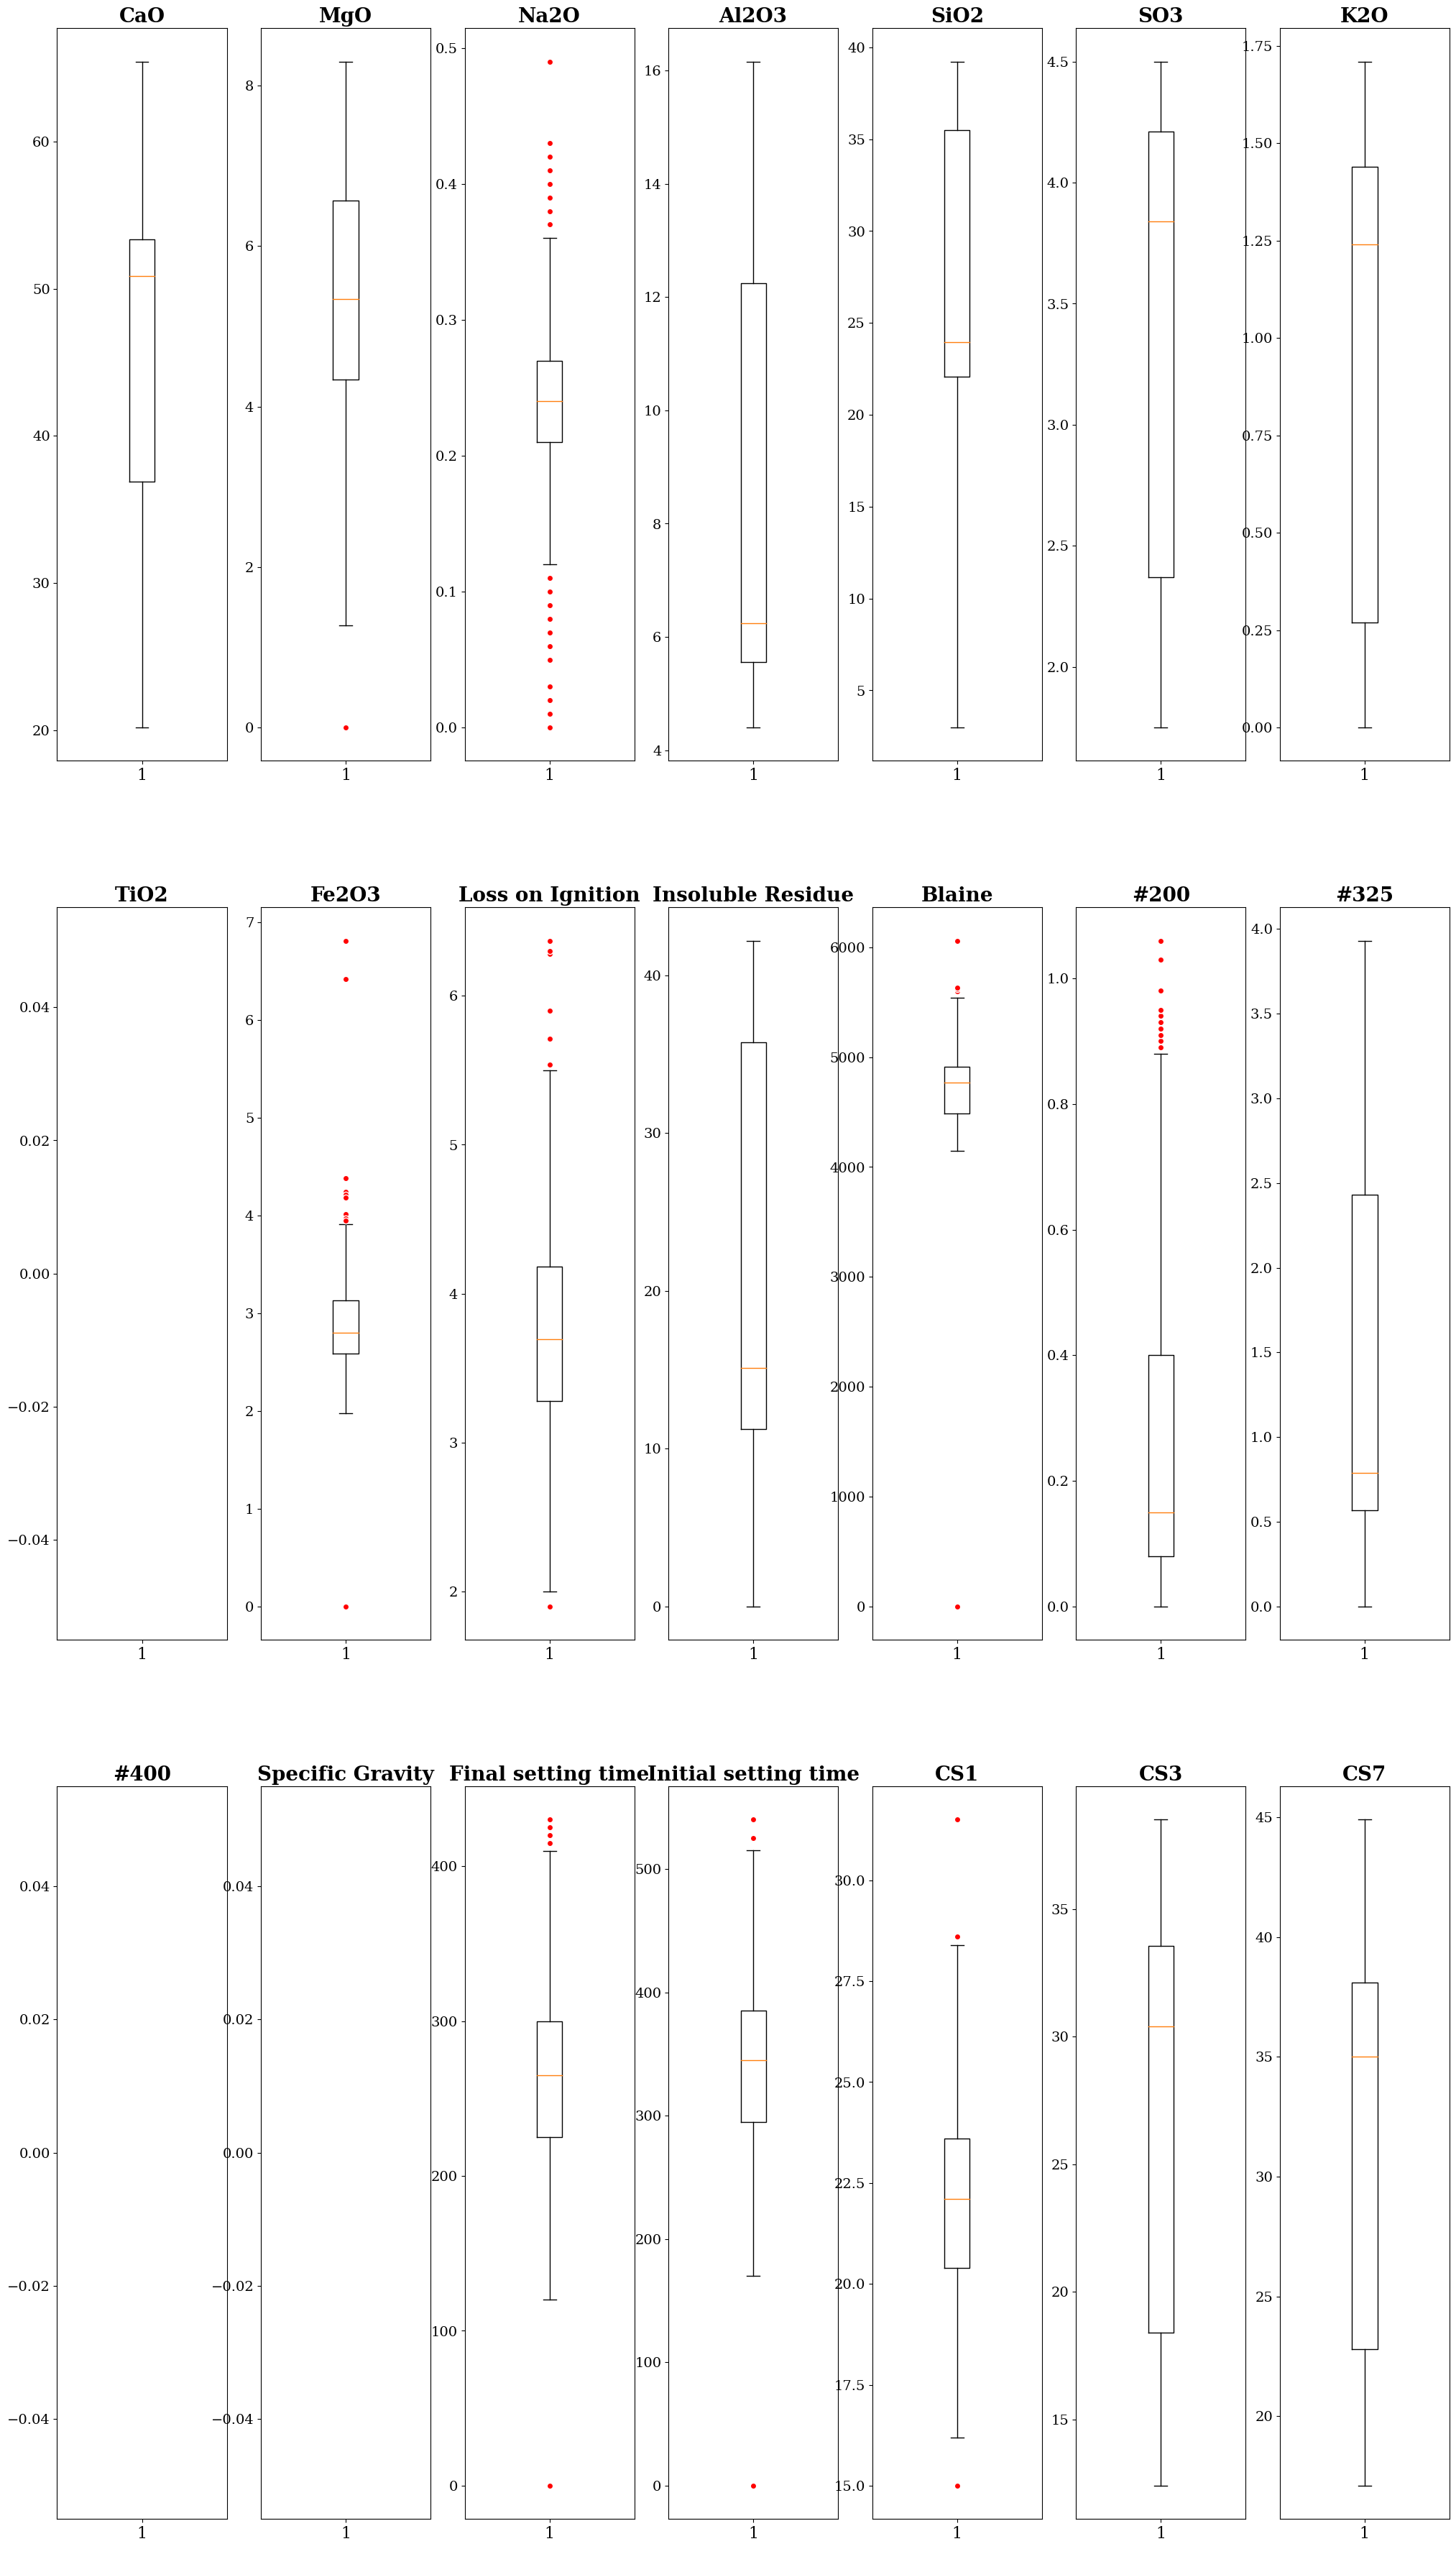

<IPython.core.display.Javascript object>

In [52]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

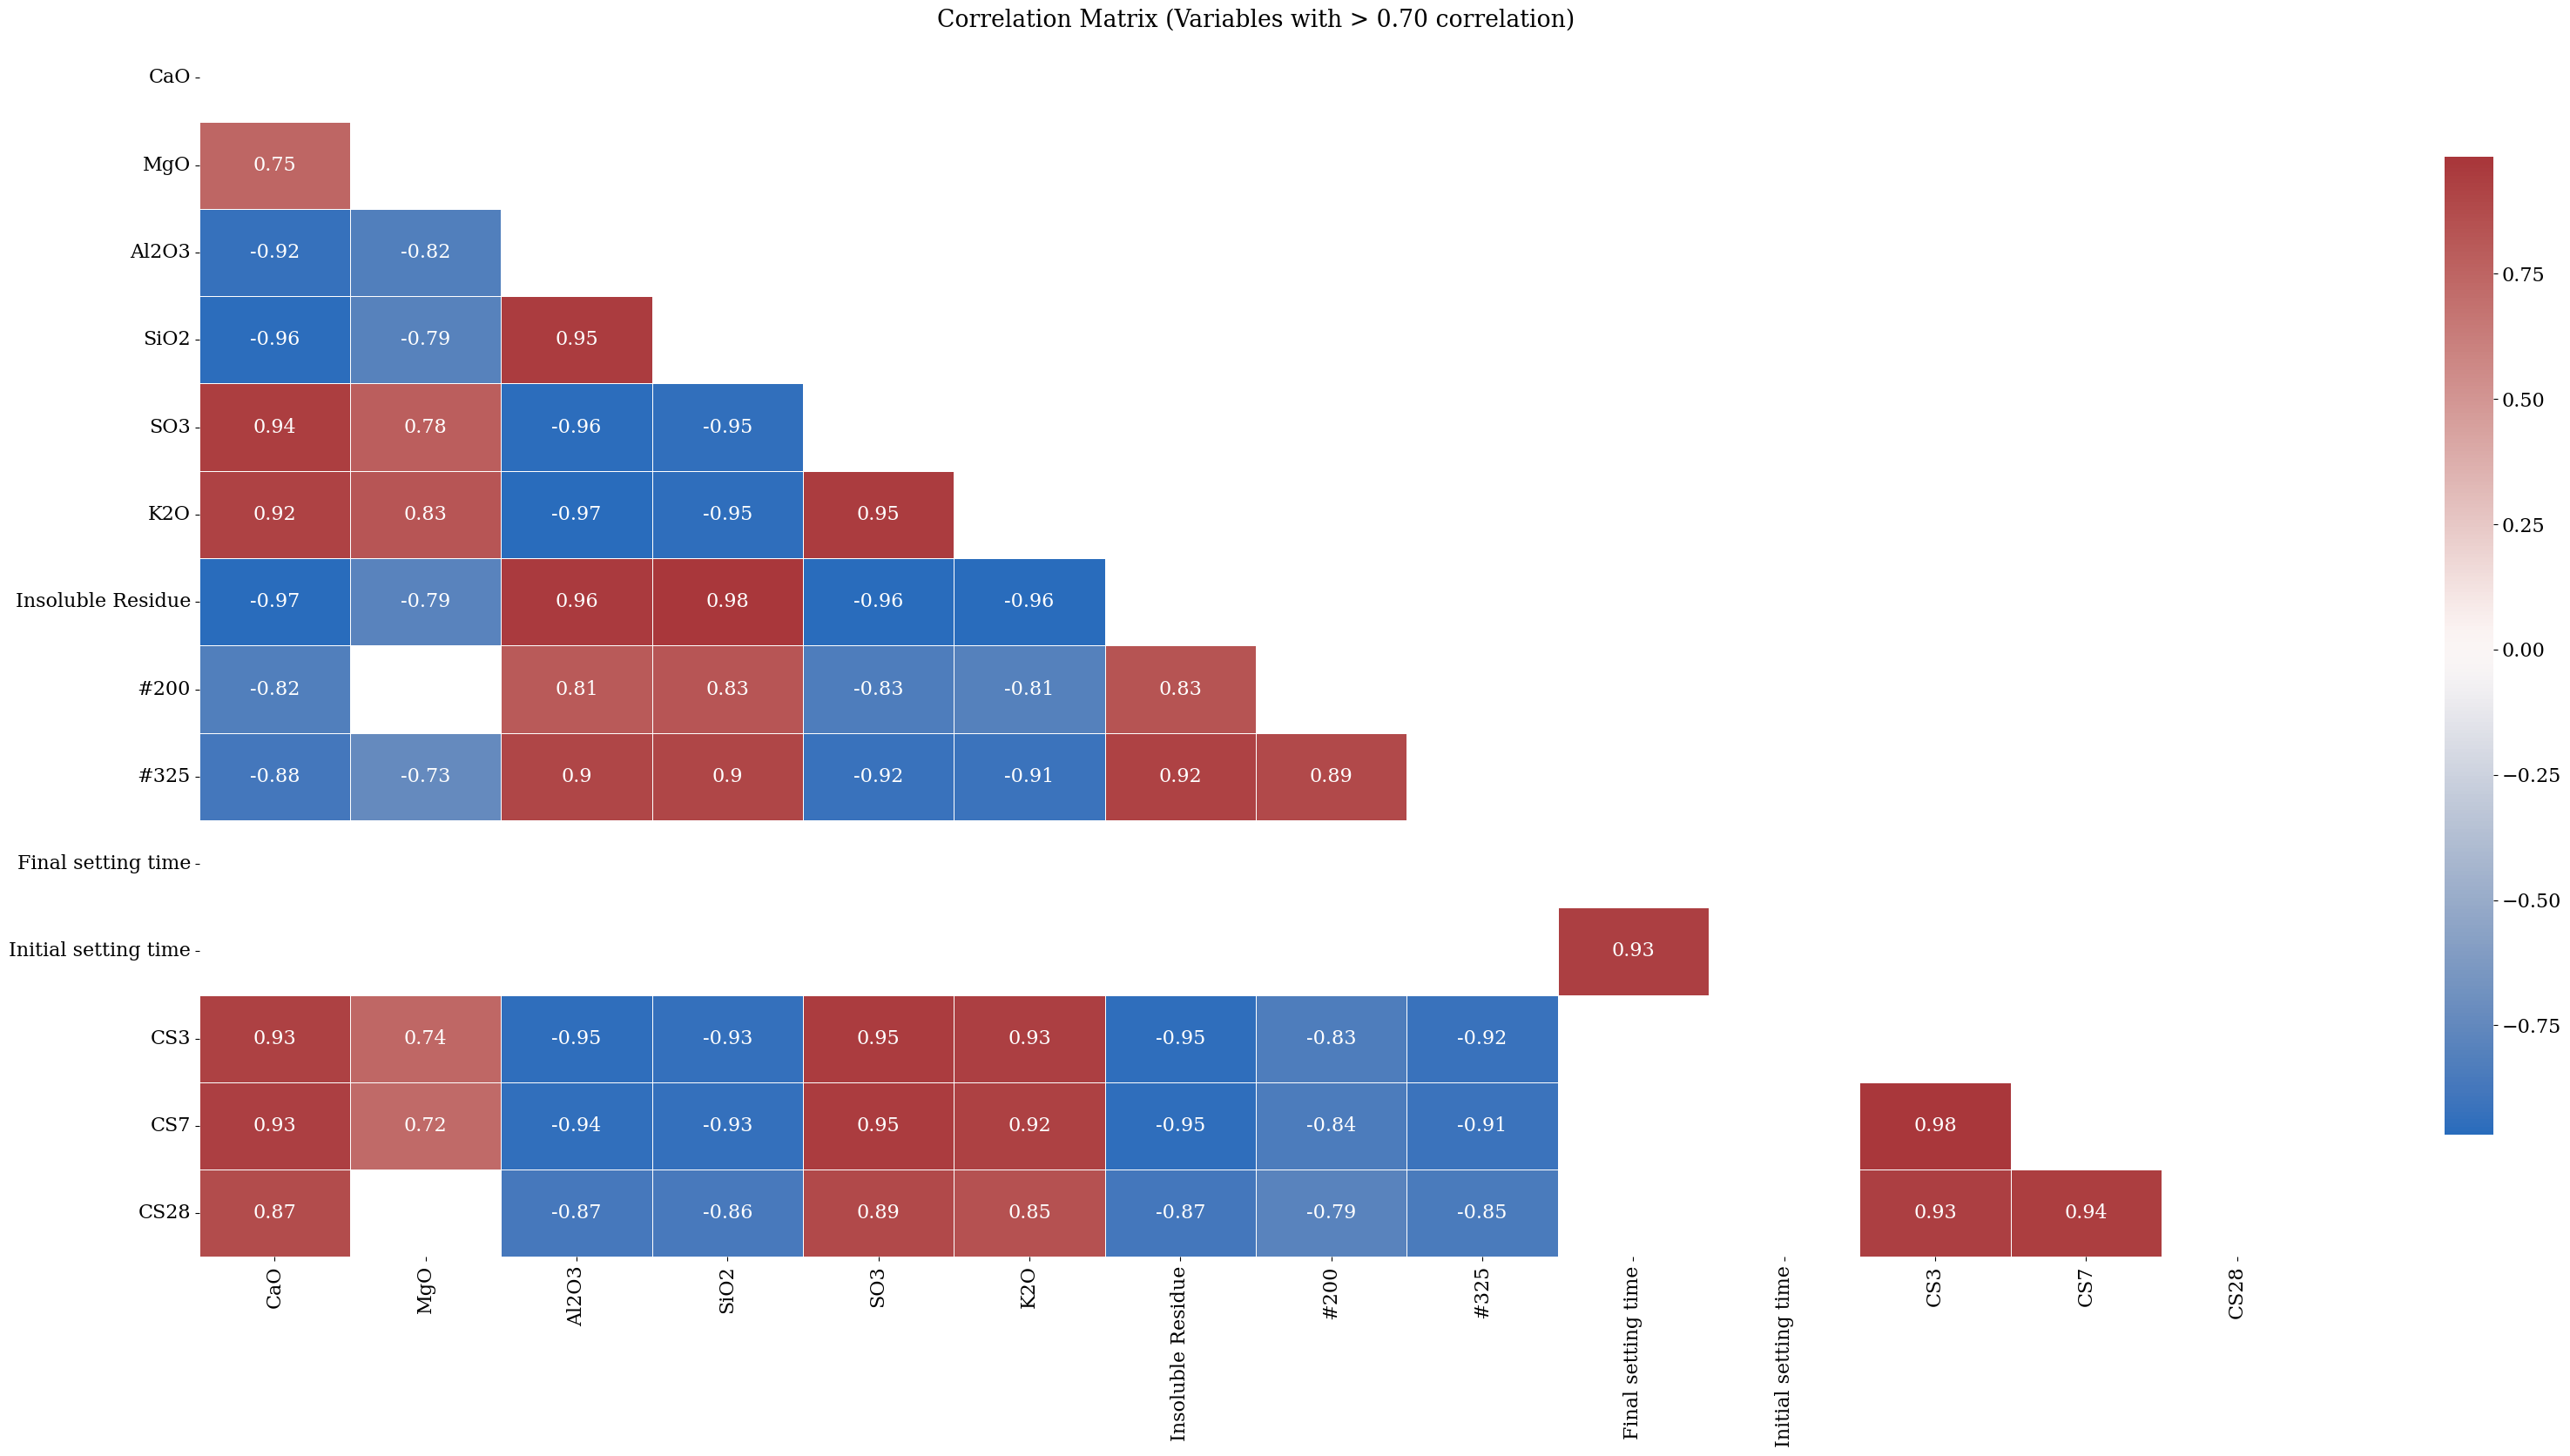

<IPython.core.display.Javascript object>

In [53]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [54]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3    CS7                  0.984111
SiO2   Insoluble Residue    0.981638
CaO    Insoluble Residue    0.968380
Al2O3  K2O                  0.967108
K2O    Insoluble Residue    0.962910
                              ...   
MgO    SO3                  0.780087
CaO    MgO                  0.746054
MgO    CS3                  0.738741
       #325                 0.734138
       CS7                  0.721805
Length: 65, dtype: float64

<IPython.core.display.Javascript object>

In [55]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.943522
CS3                   CS28    0.930743
SO3                   CS28    0.891909
CaO                   CS28    0.874819
Insoluble Residue     CS28    0.874575
Al2O3                 CS28    0.867674
SiO2                  CS28    0.857880
#325                  CS28    0.850736
K2O                   CS28    0.849402
#200                  CS28    0.786623
MgO                   CS28    0.638994
Fe2O3                 CS28    0.564031
Initial setting time  CS28    0.557464
Blaine                CS28    0.526179
Final setting time    CS28    0.522321
Loss on Ignition      CS28    0.169231
Na2O                  CS28    0.066899
CS1                   CS28    0.034359
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

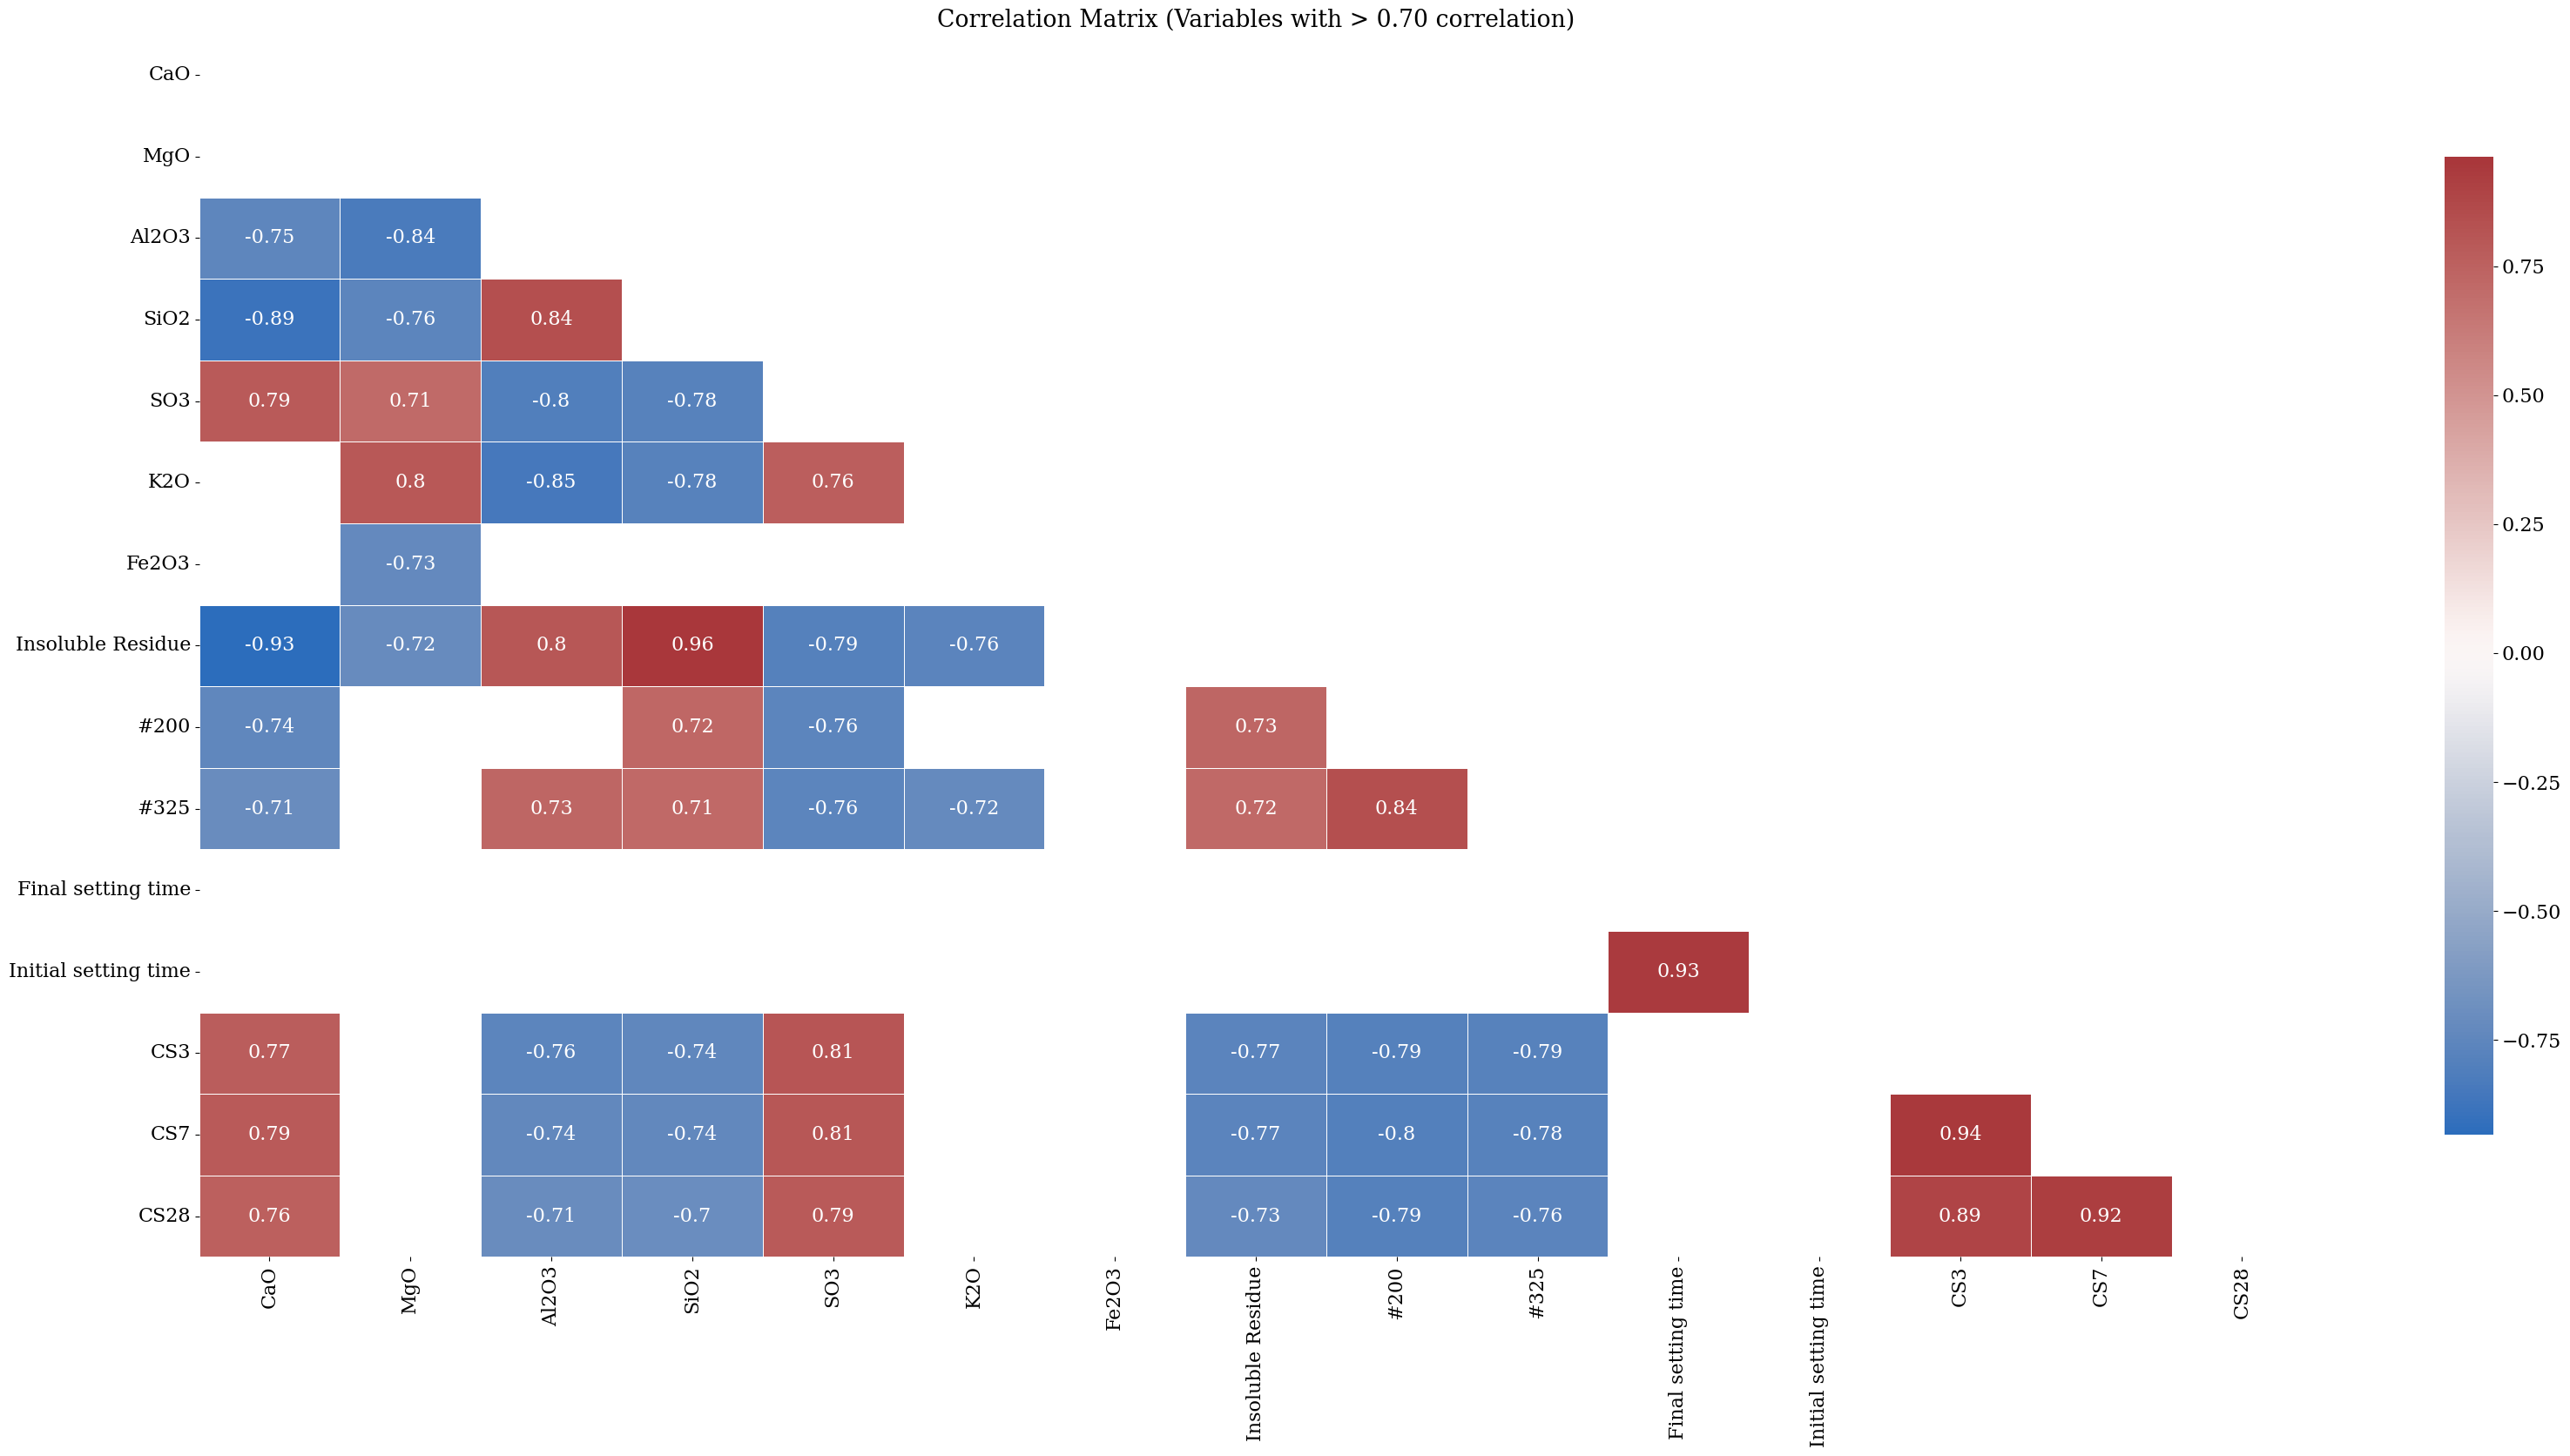

<IPython.core.display.Javascript object>

In [56]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [57]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

SiO2                Insoluble Residue       0.962762
CS3                 CS7                     0.943325
Final setting time  Initial setting time    0.934827
CaO                 Insoluble Residue       0.933746
CS7                 CS28                    0.924237
CS3                 CS28                    0.892966
CaO                 SiO2                    0.886100
Al2O3               K2O                     0.847568
#200                #325                    0.840962
Al2O3               SiO2                    0.837507
MgO                 Al2O3                   0.836672
SO3                 CS3                     0.811229
                    CS7                     0.807085
Al2O3               Insoluble Residue       0.803147
                    SO3                     0.802656
#200                CS7                     0.798754
MgO                 K2O                     0.795376
SO3                 CS28                    0.792047
                    Insoluble Residue       0.

<IPython.core.display.Javascript object>

In [58]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.924237
CS3                   CS28    0.892966
SO3                   CS28    0.792047
#200                  CS28    0.791215
#325                  CS28    0.764509
CaO                   CS28    0.759186
Insoluble Residue     CS28    0.730103
Al2O3                 CS28    0.707031
SiO2                  CS28    0.702765
K2O                   CS28    0.678209
Blaine                CS28    0.666302
Fe2O3                 CS28    0.611083
MgO                   CS28    0.590816
Initial setting time  CS28    0.553686
Final setting time    CS28    0.497401
Loss on Ignition      CS28    0.161436
Na2O                  CS28    0.159702
CS1                   CS28    0.033892
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

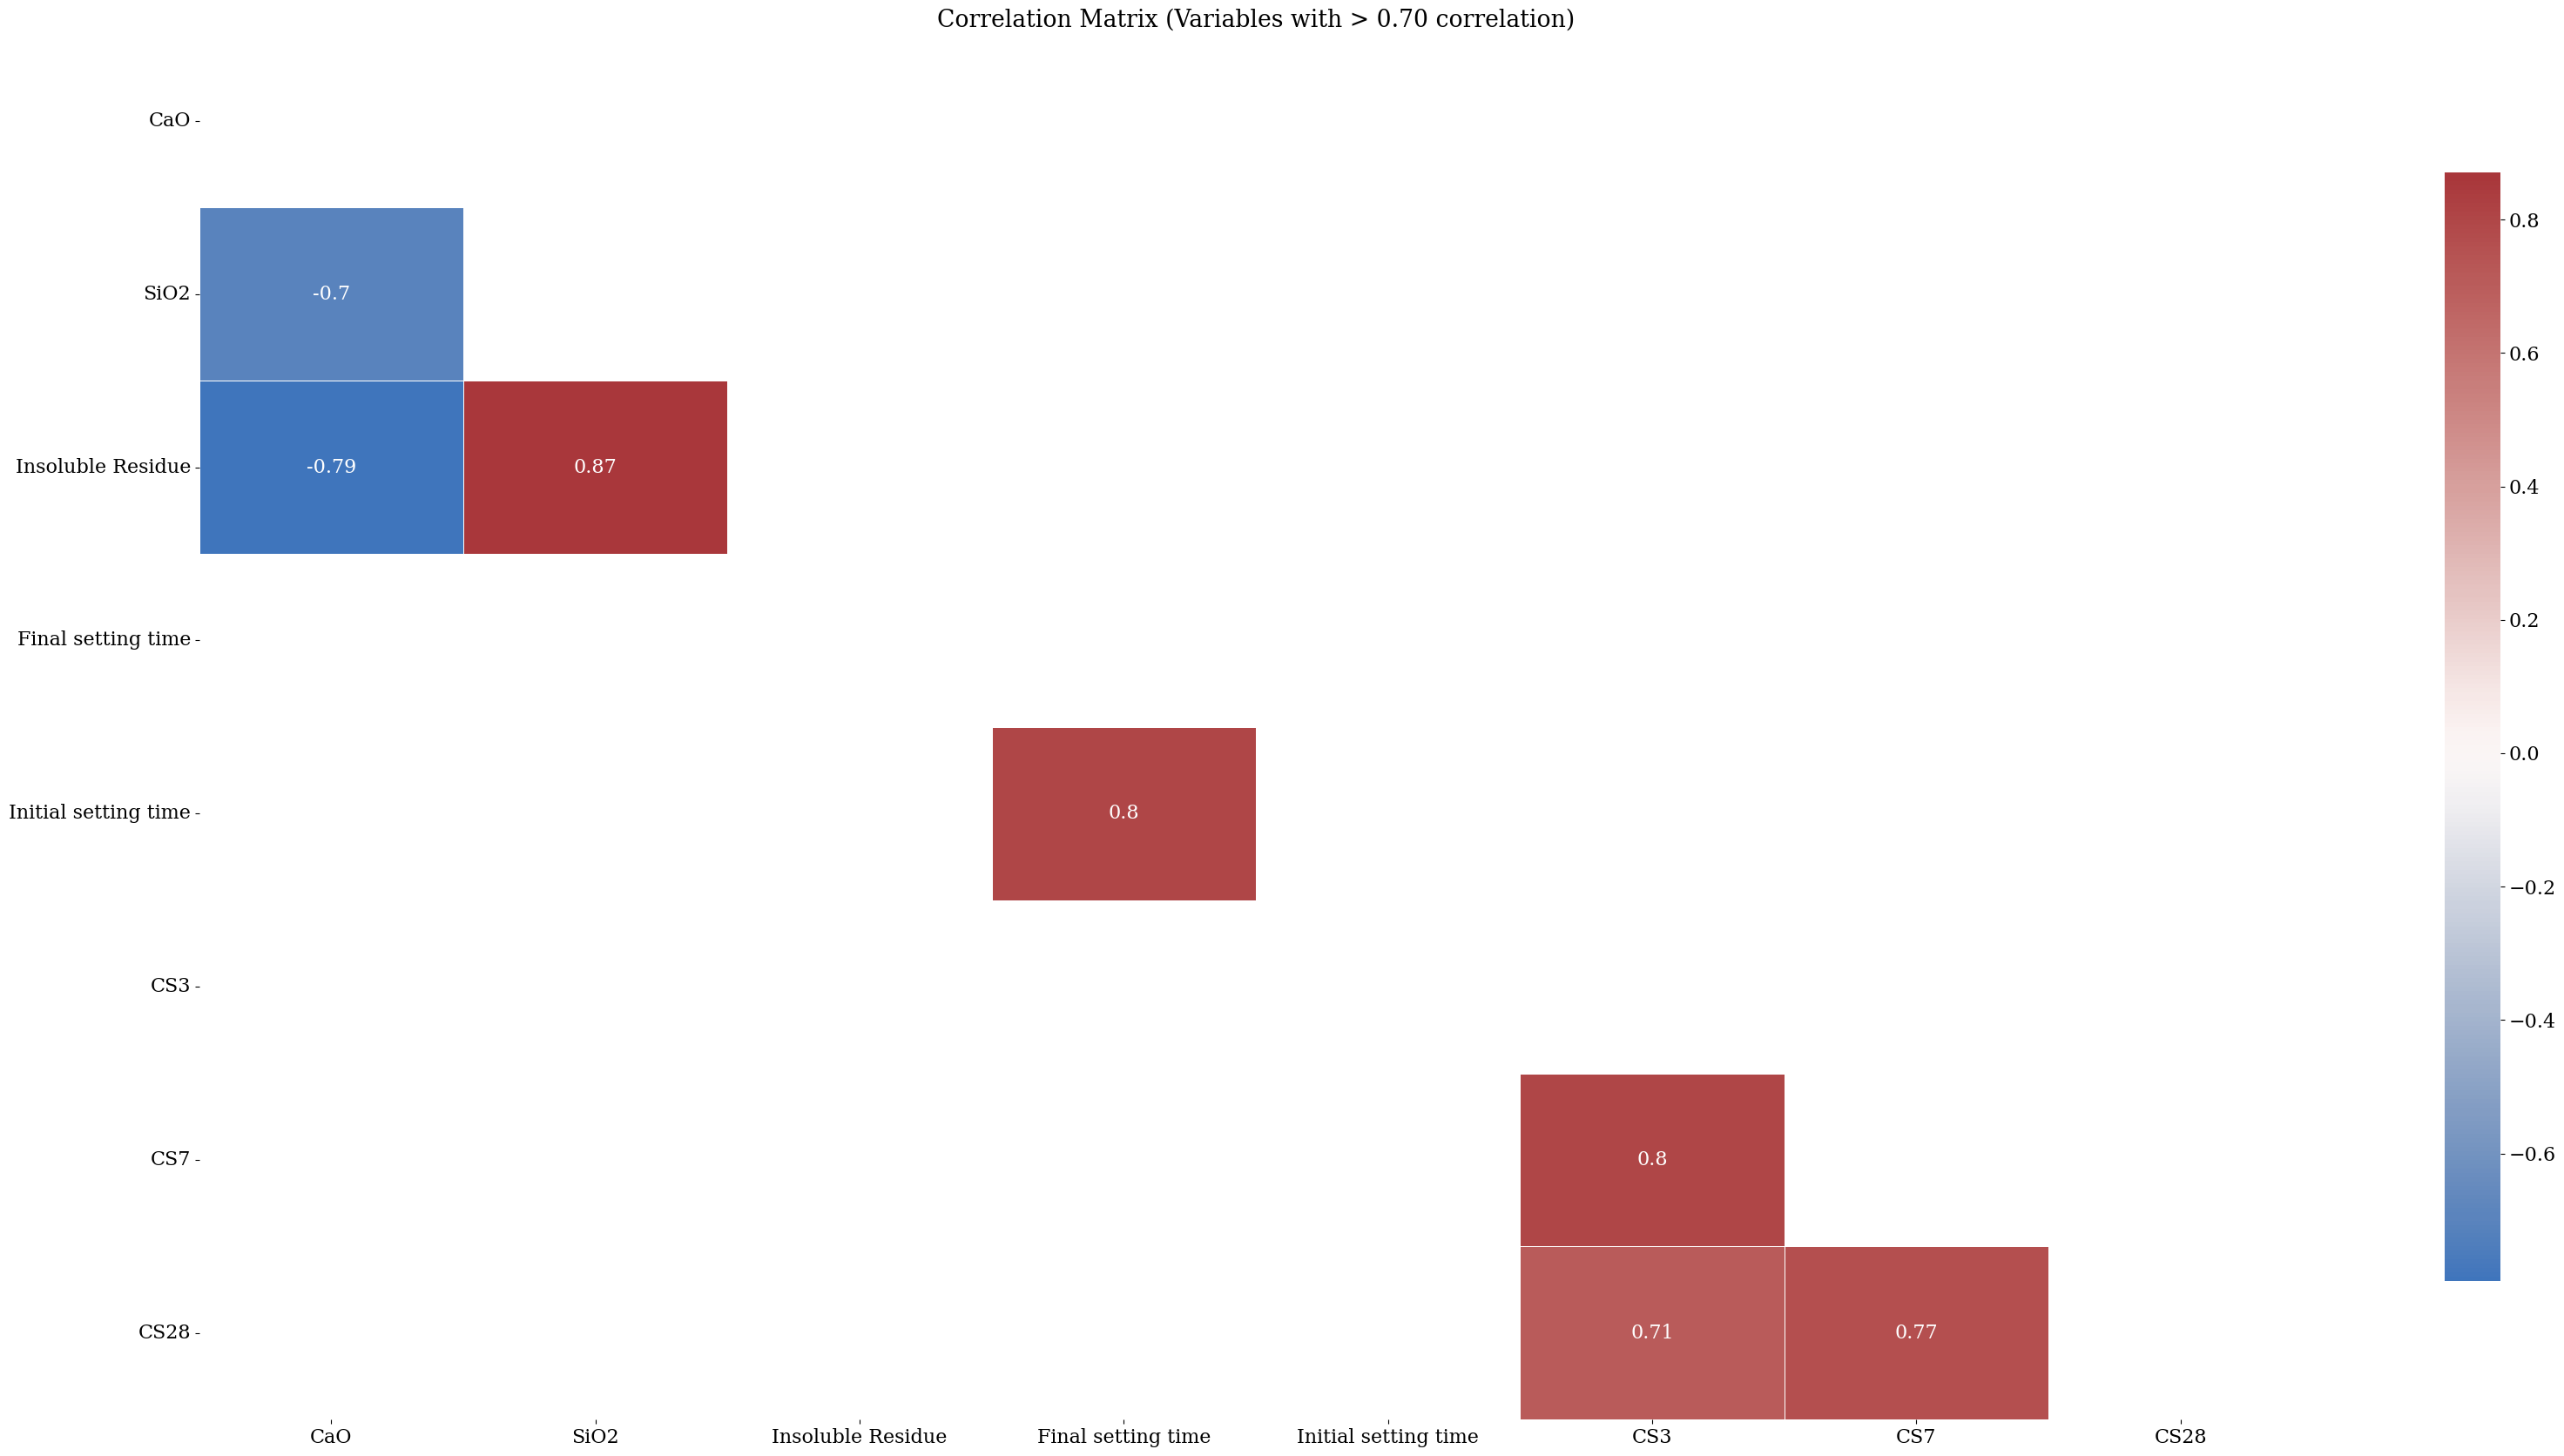

<IPython.core.display.Javascript object>

In [59]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [60]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

SiO2                Insoluble Residue       0.870137
CS3                 CS7                     0.803627
Final setting time  Initial setting time    0.801675
CaO                 Insoluble Residue       0.791368
CS7                 CS28                    0.765546
CS3                 CS28                    0.710838
CaO                 SiO2                    0.704751
dtype: float64

<IPython.core.display.Javascript object>

In [61]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.765546
CS3                   CS28    0.710838
#200                  CS28    0.571884
SO3                   CS28    0.566304
#325                  CS28    0.533378
CaO                   CS28    0.524922
Insoluble Residue     CS28    0.494309
Al2O3                 CS28    0.461130
SiO2                  CS28    0.459447
Blaine                CS28    0.448493
K2O                   CS28    0.426266
Fe2O3                 CS28    0.421028
MgO                   CS28    0.379898
Initial setting time  CS28    0.367545
Final setting time    CS28    0.329299
Na2O                  CS28    0.114807
Loss on Ignition      CS28    0.110000
CS1                   CS28    0.021744
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

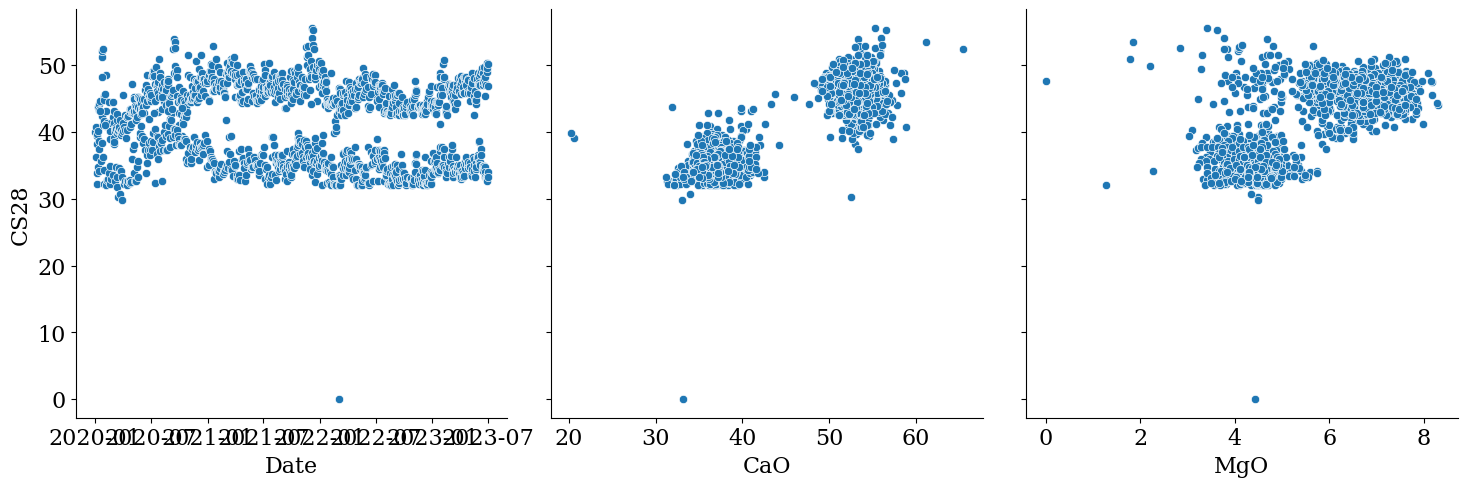

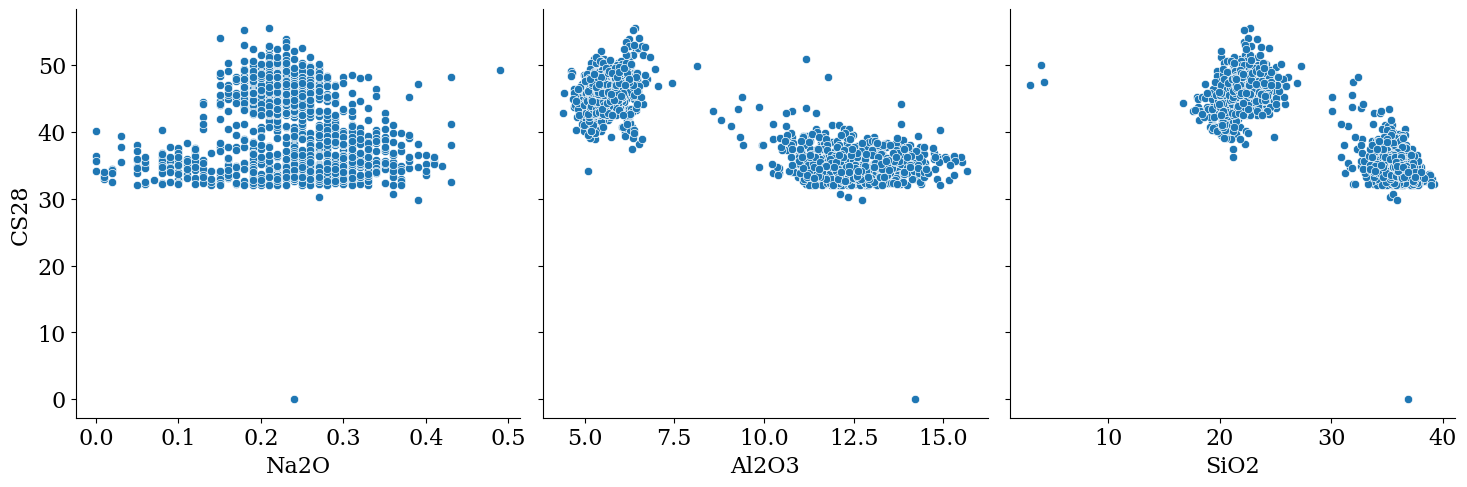

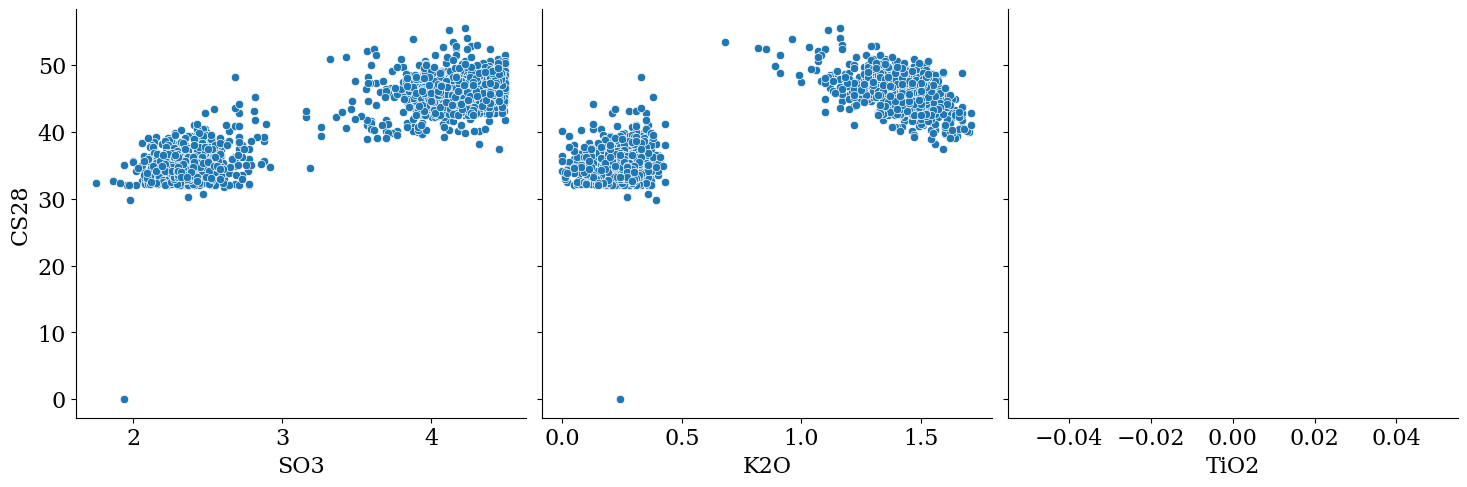

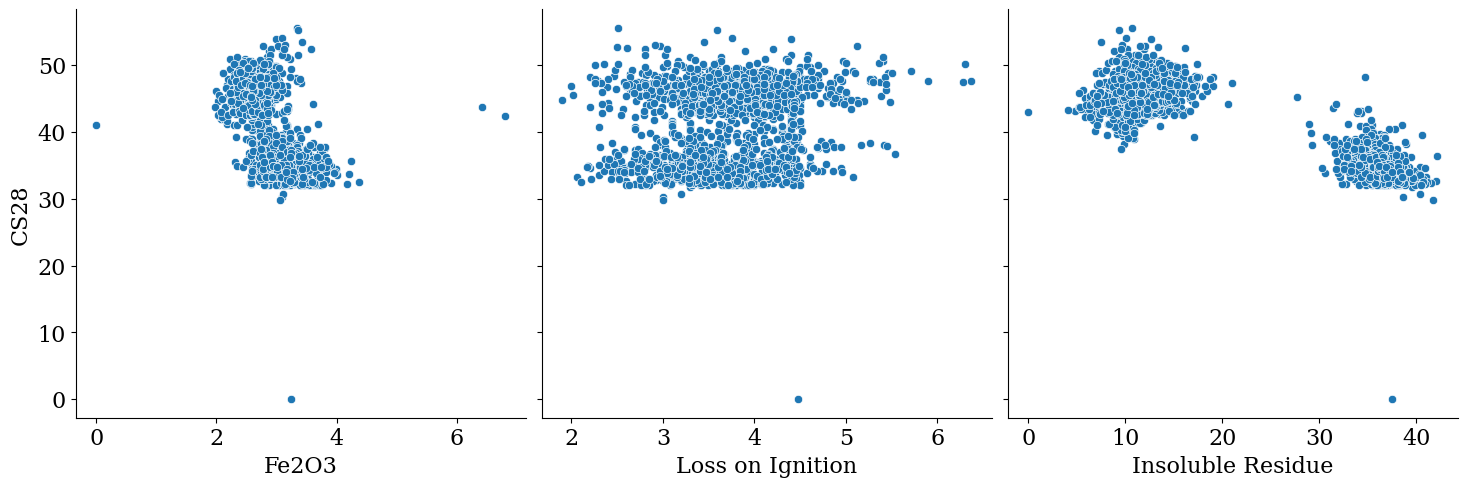

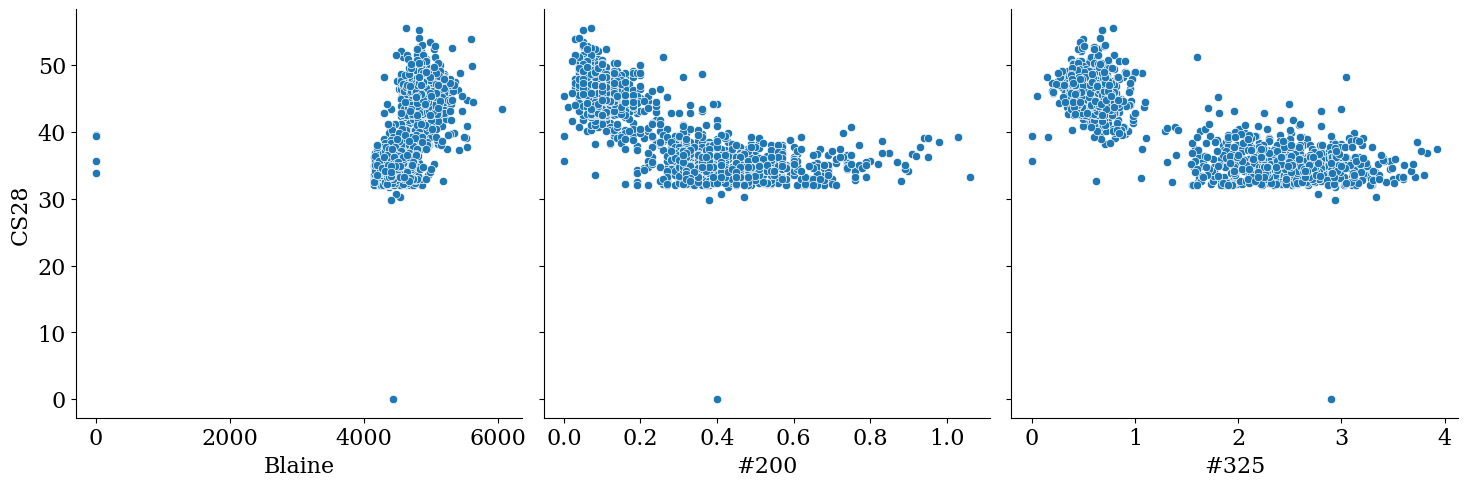

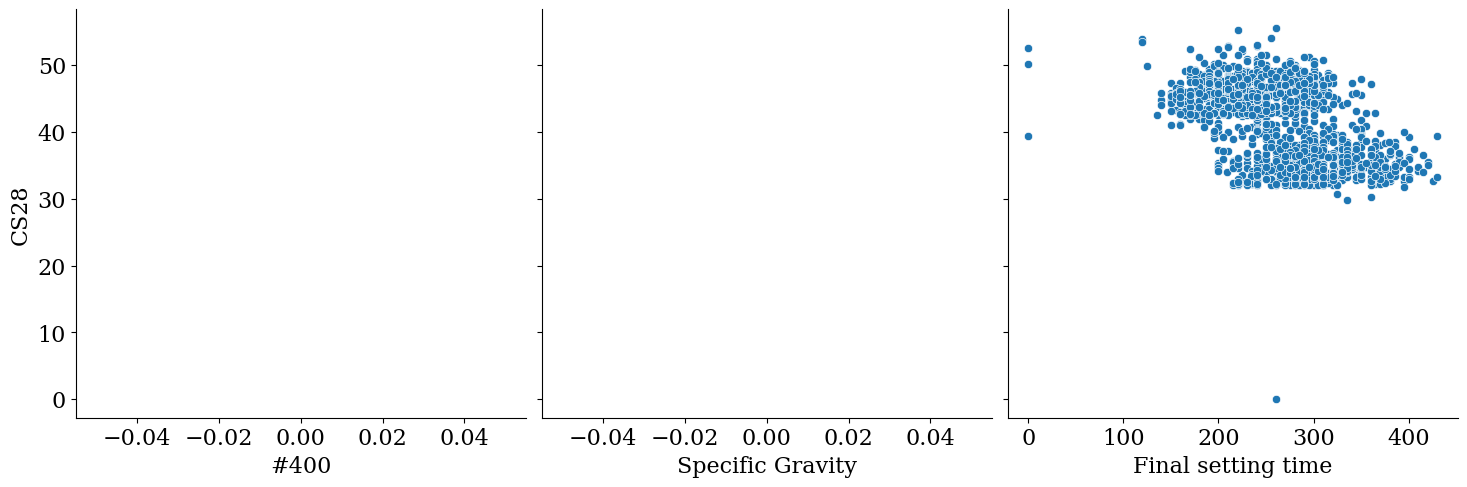

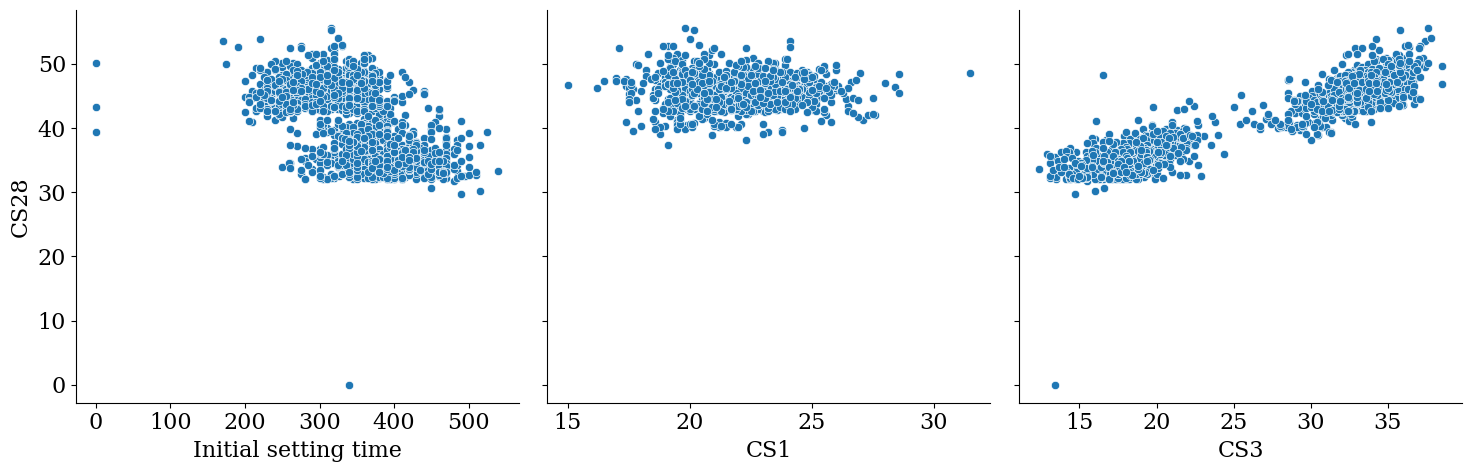

<IPython.core.display.Javascript object>

In [62]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [63]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

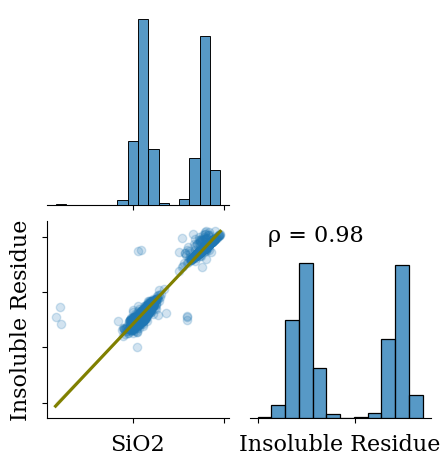

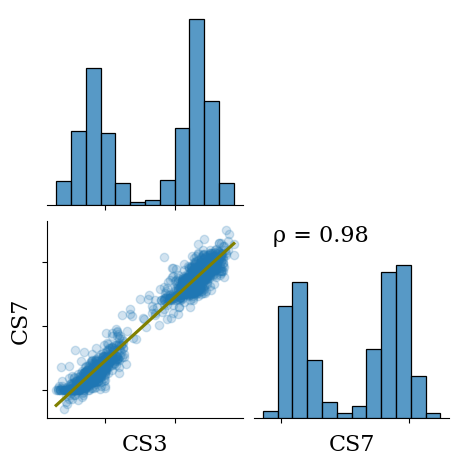

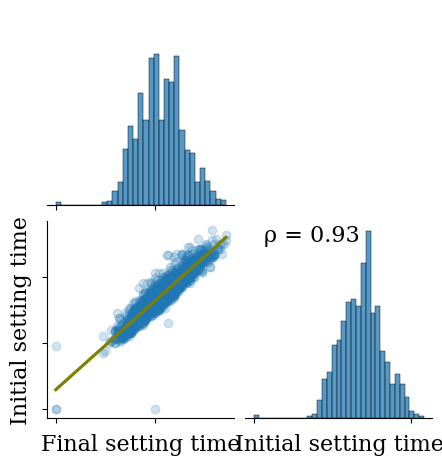

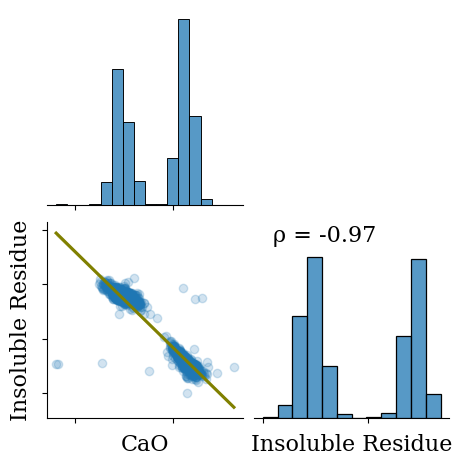

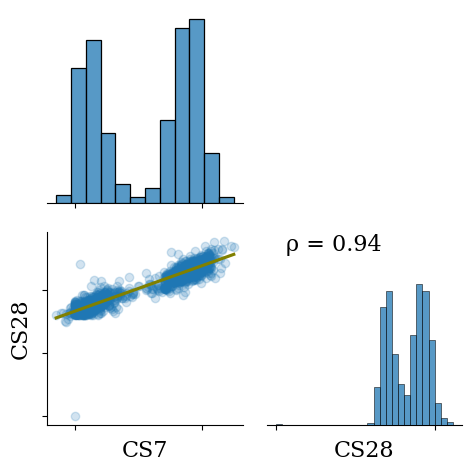

<IPython.core.display.Javascript object>

In [64]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [65]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

809 valid days out of 819


<IPython.core.display.Javascript object>

In [66]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [67]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6}}

<IPython.core.display.Javascript object>

In [68]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        21
      2        17
      3        20
      4        18
      5        20
      6        20
      7        21
      8        21
      9        21
      10       21
      11       19
      12       20
2021  1        20
      2        15
      3        23
      4        20
      5        21
      6        20
      7        22
      8        22
      9        19
      10       19
      11       19
      12       21
2022  1        20
      2        18
      3        22
      4        17
      5        22
      6        16
      7        20
      8        21
      9        18
      10       15
      11       16
      12       19
2023  1        18
      2        15
      3        22
      4        18
      5        21
      6        21
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

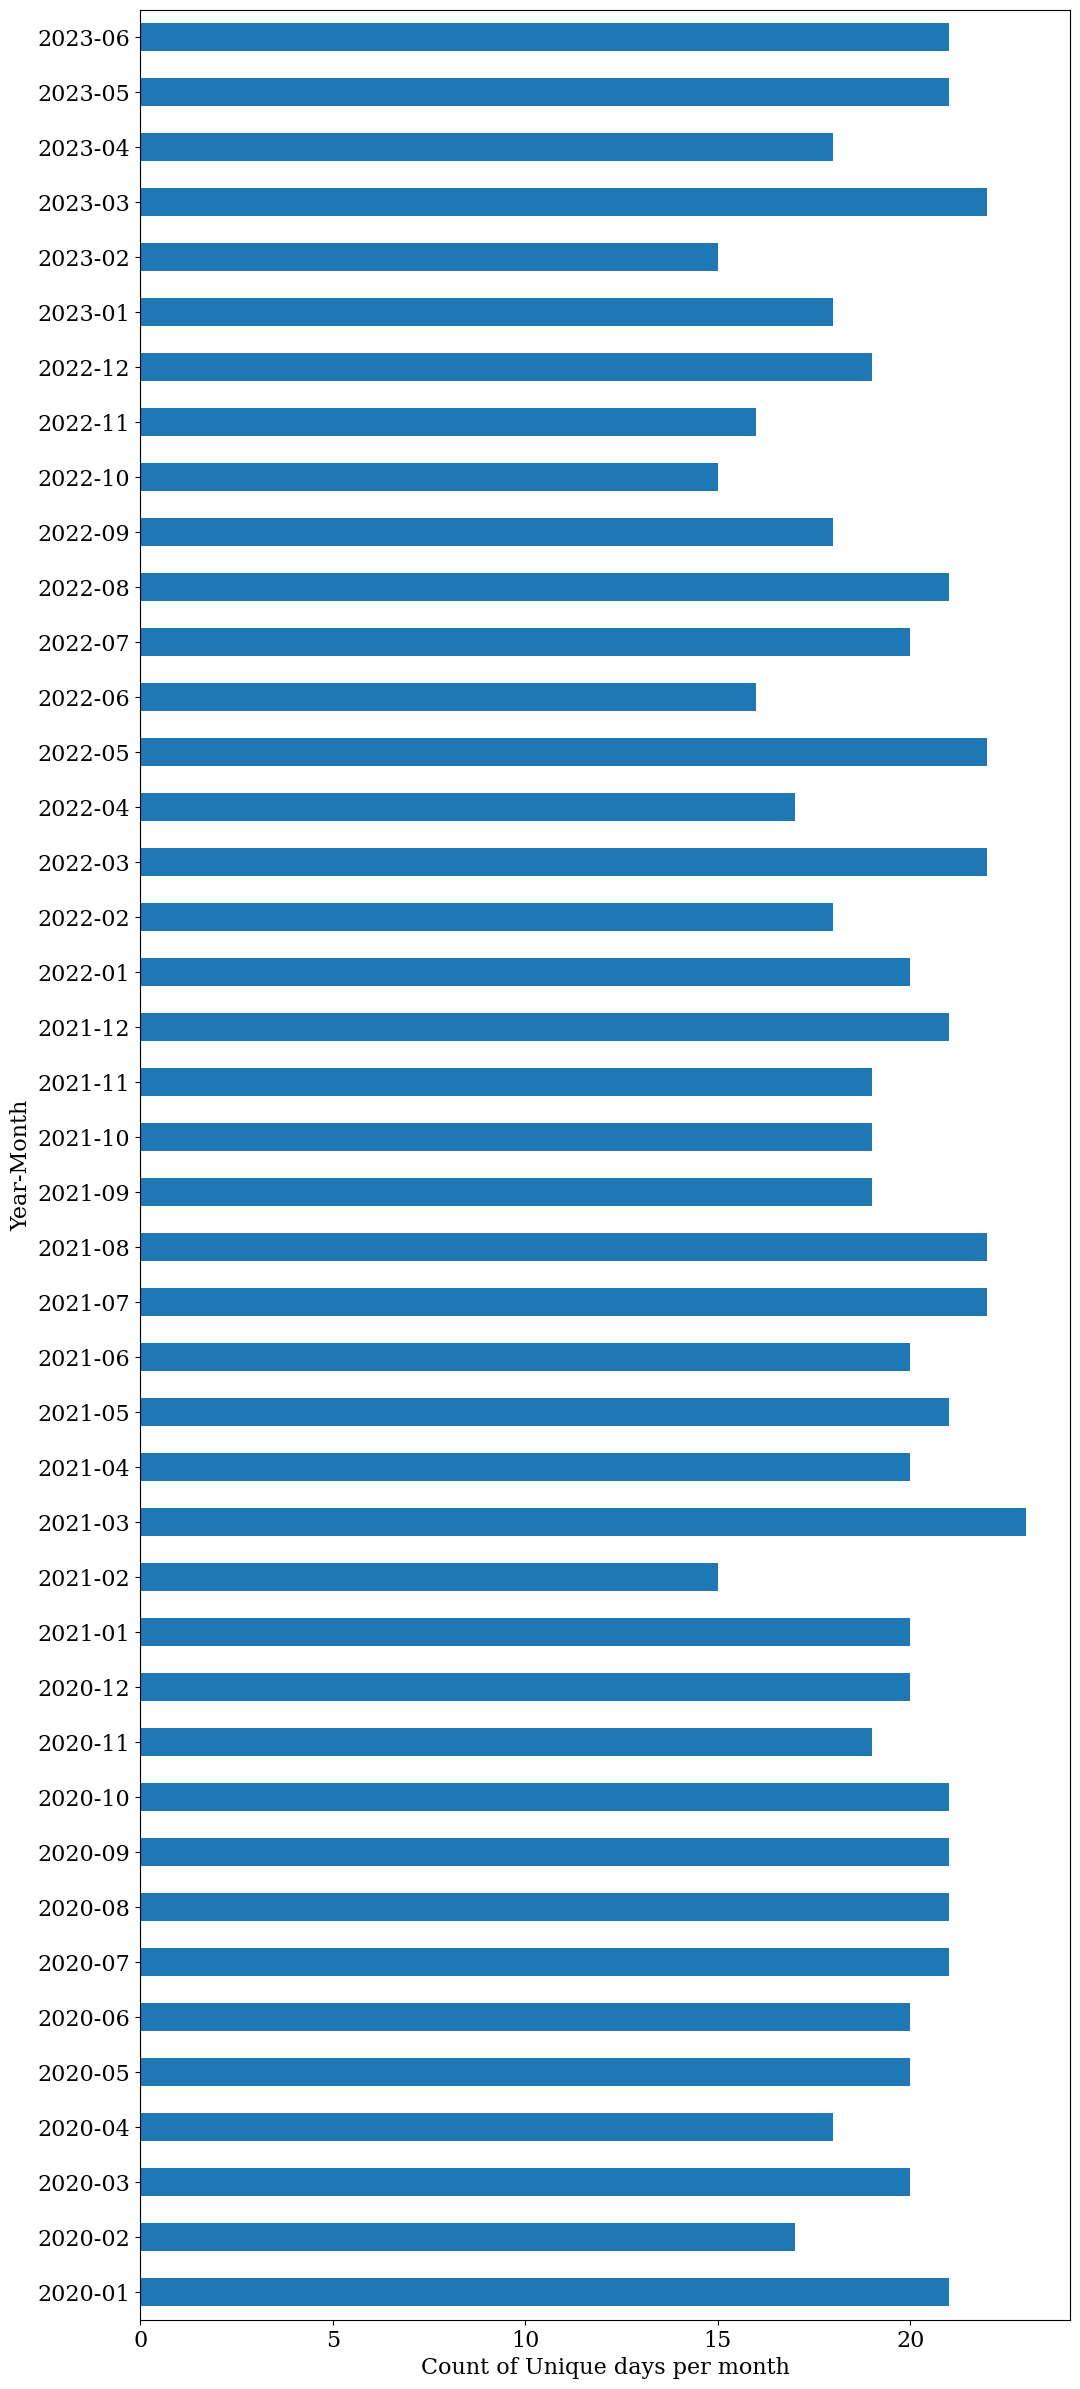

<IPython.core.display.Javascript object>

In [69]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [70]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        33
      2        27
      3        31
      4        27
      5        31
      6        32
      7        37
      8        35
      9        33
      10       33
      11       32
      12       32
2021  1        32
      2        24
      3        37
      4        31
      5        34
      6        32
      7        35
      8        43
      9        38
      10       38
      11       38
      12       42
2022  1        44
      2        38
      3        42
      4        34
      5        42
      6        27
      7        38
      8        42
      9        37
      10       26
      11       32
      12       40
2023  1        36
      2        30
      3        43
      4        36
      5        38
      6        40
Name: size, dtype: int64


<IPython.core.display.Javascript object>

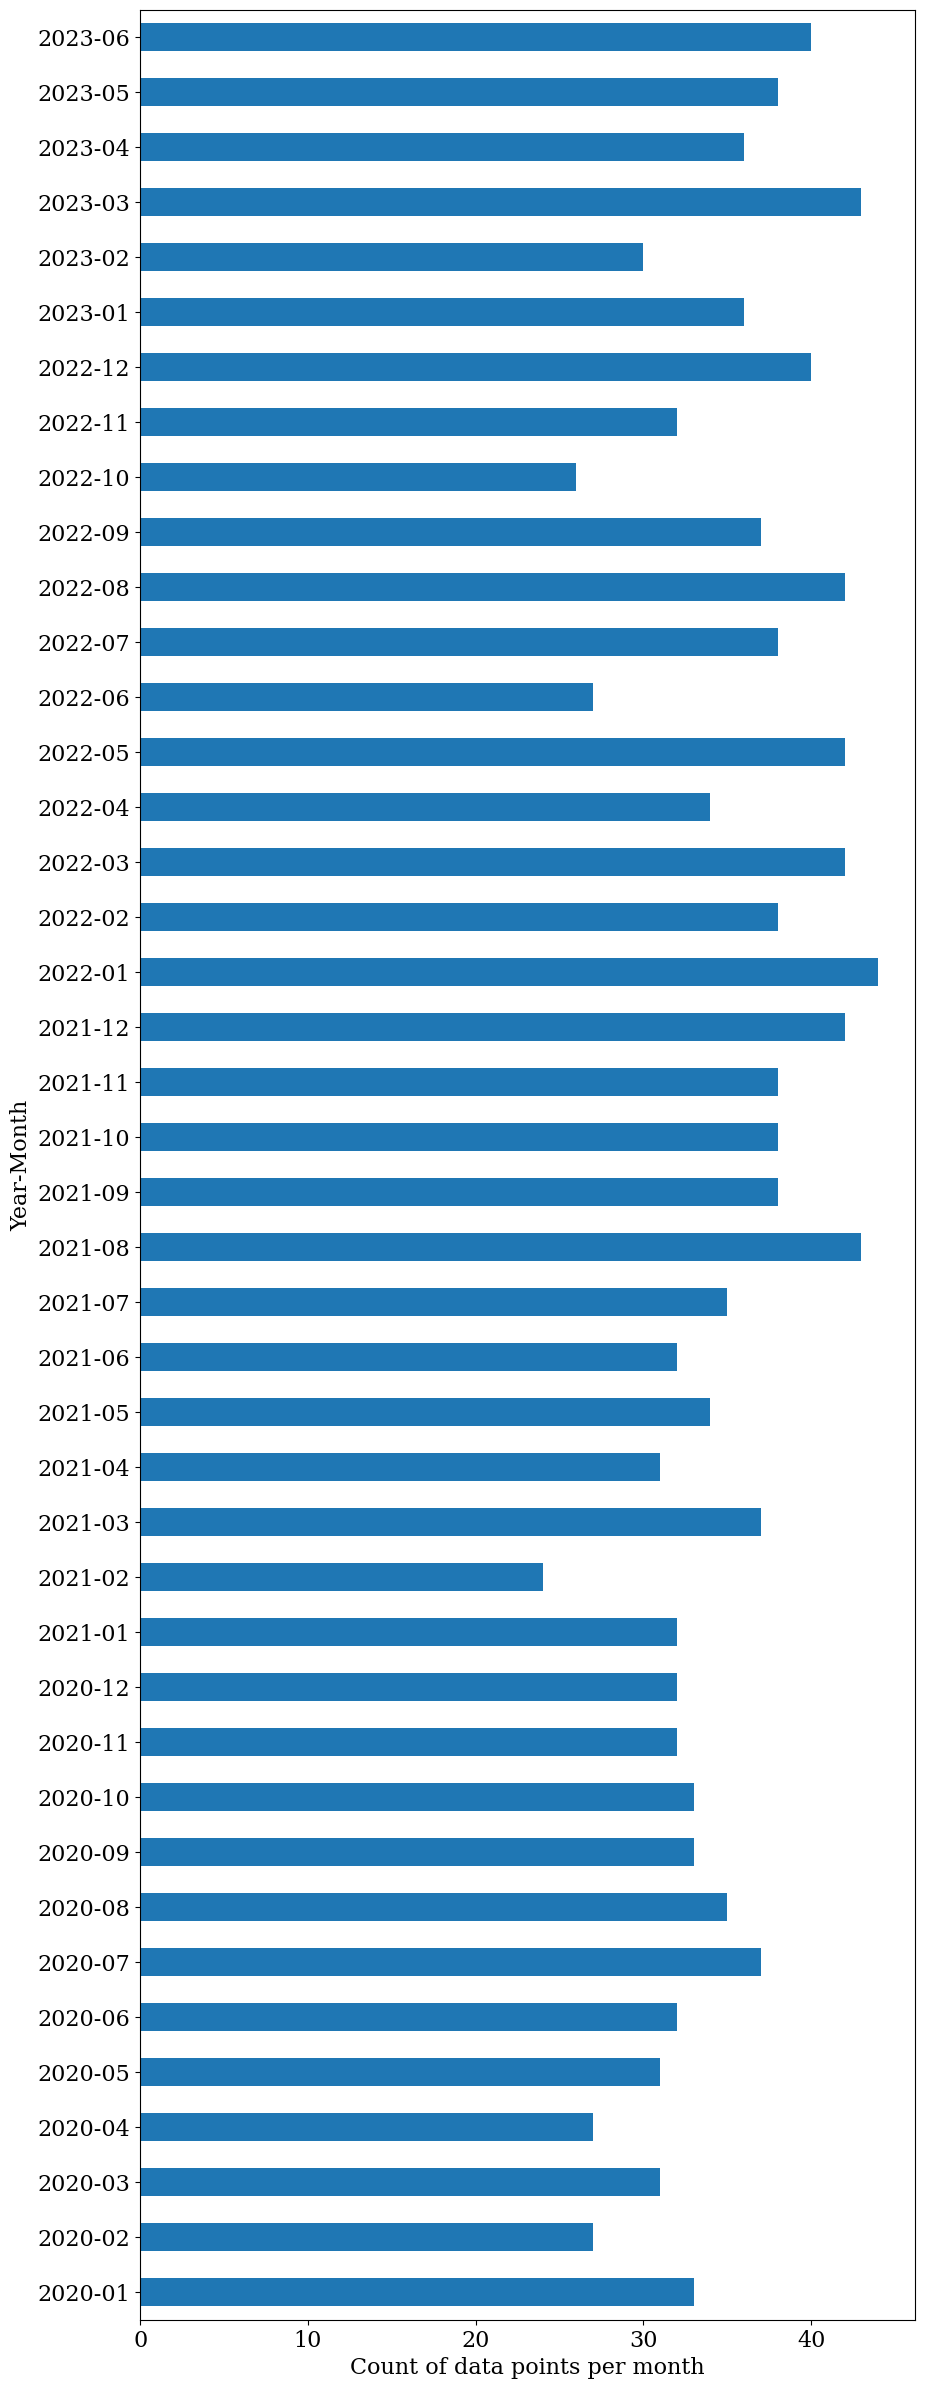

<IPython.core.display.Javascript object>

In [71]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [72]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-2 has the minimum number of days with samples - 24
2022-1 has the maximum number of days with samples - 44


<IPython.core.display.Javascript object>

In [73]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 31, 2021: 35, 2022: 36, 2023: 37}

Mean number of observations - all years
35


<IPython.core.display.Javascript object>

In [74]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  819.000000
mean     1.797314
std      0.482397
min      1.000000
25%      2.000000
50%      2.000000
75%      2.000000
max      4.000000

<IPython.core.display.Javascript object>

In [75]:
day_counts[["DayCount"]].value_counts()

DayCount
2           616
1           188
3             8
4             7
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [76]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
128  2020      7   20         4
483  2022      1    6         4
489  2022      1   17         4
507  2022      2   11         4
635  2022      8   31         4
651  2022      9   28         4
699  2022     12   26         4

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

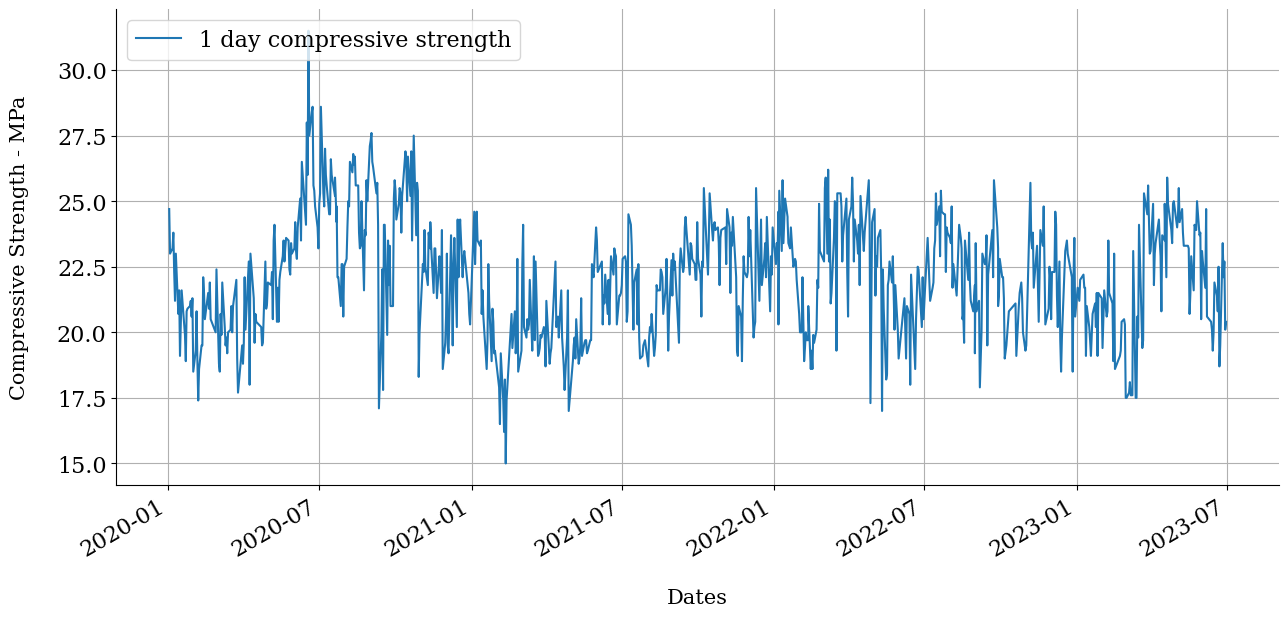

<IPython.core.display.Javascript object>

In [77]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

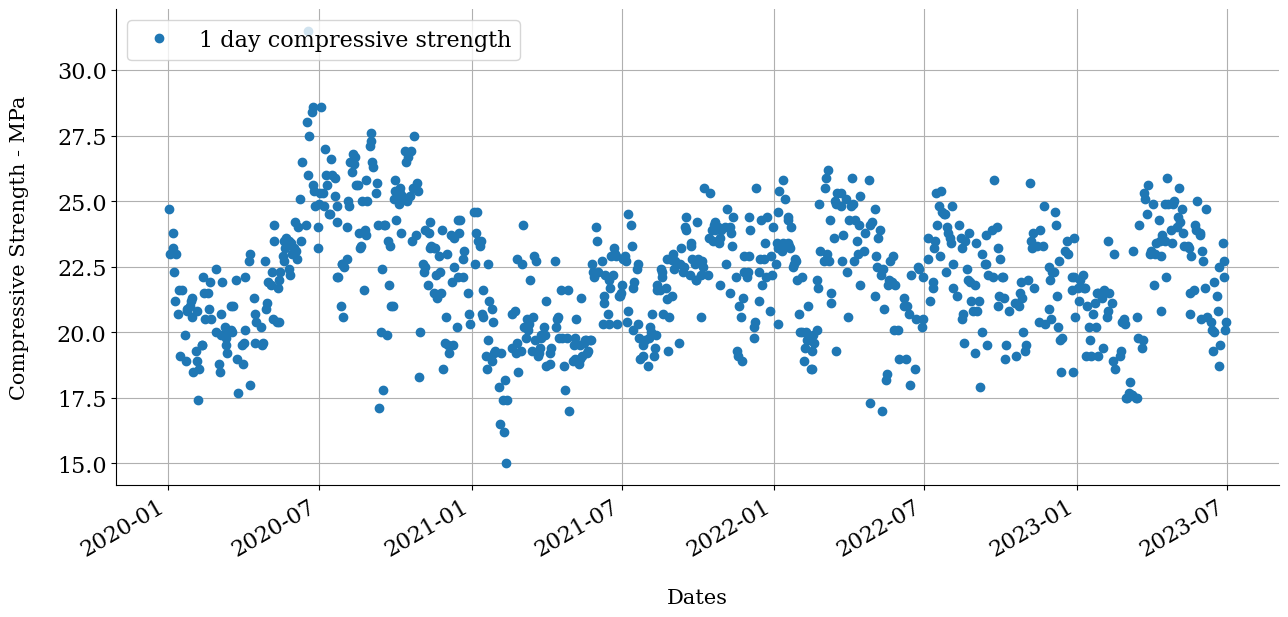

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

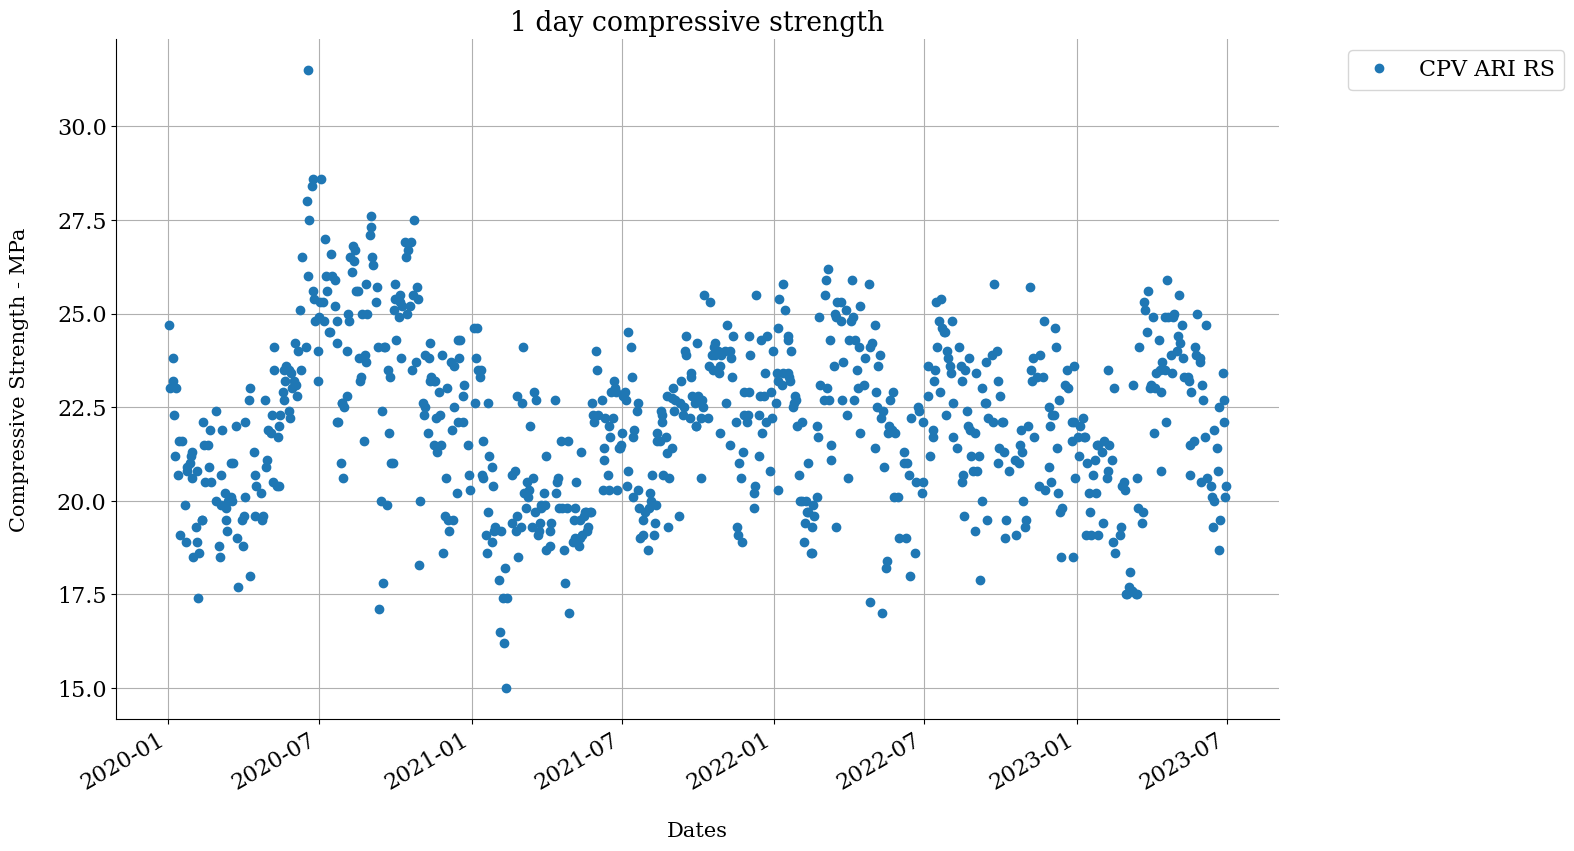

<IPython.core.display.Javascript object>

In [79]:
import matplotlib.pyplot as plt

tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

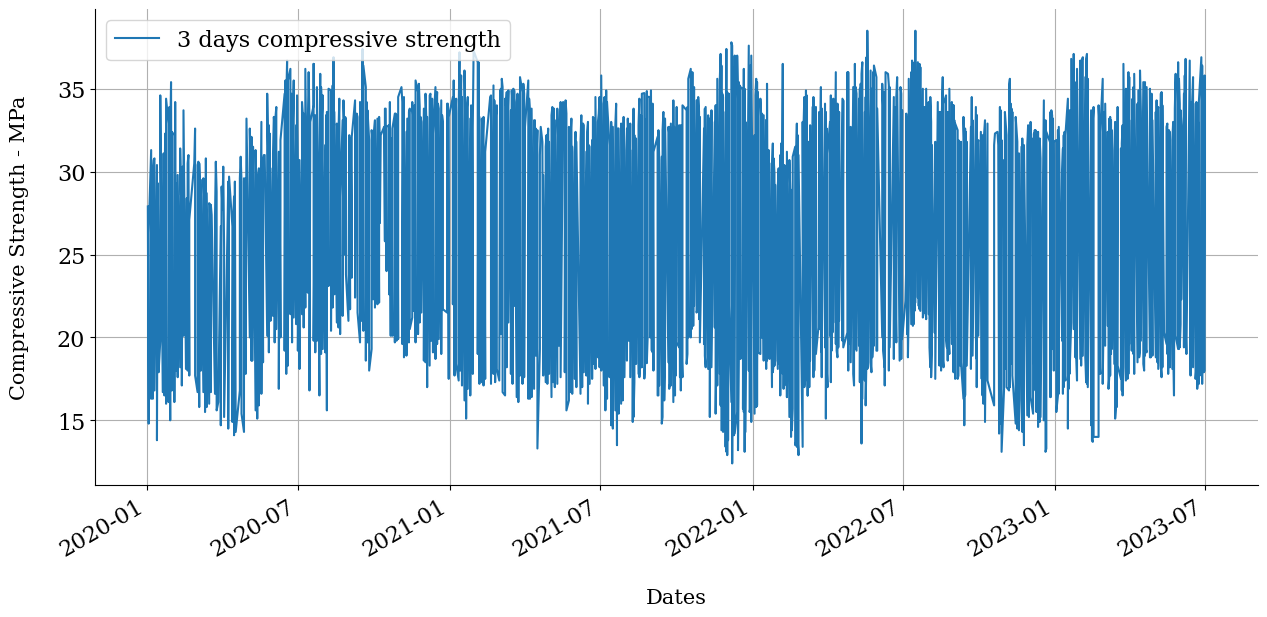

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

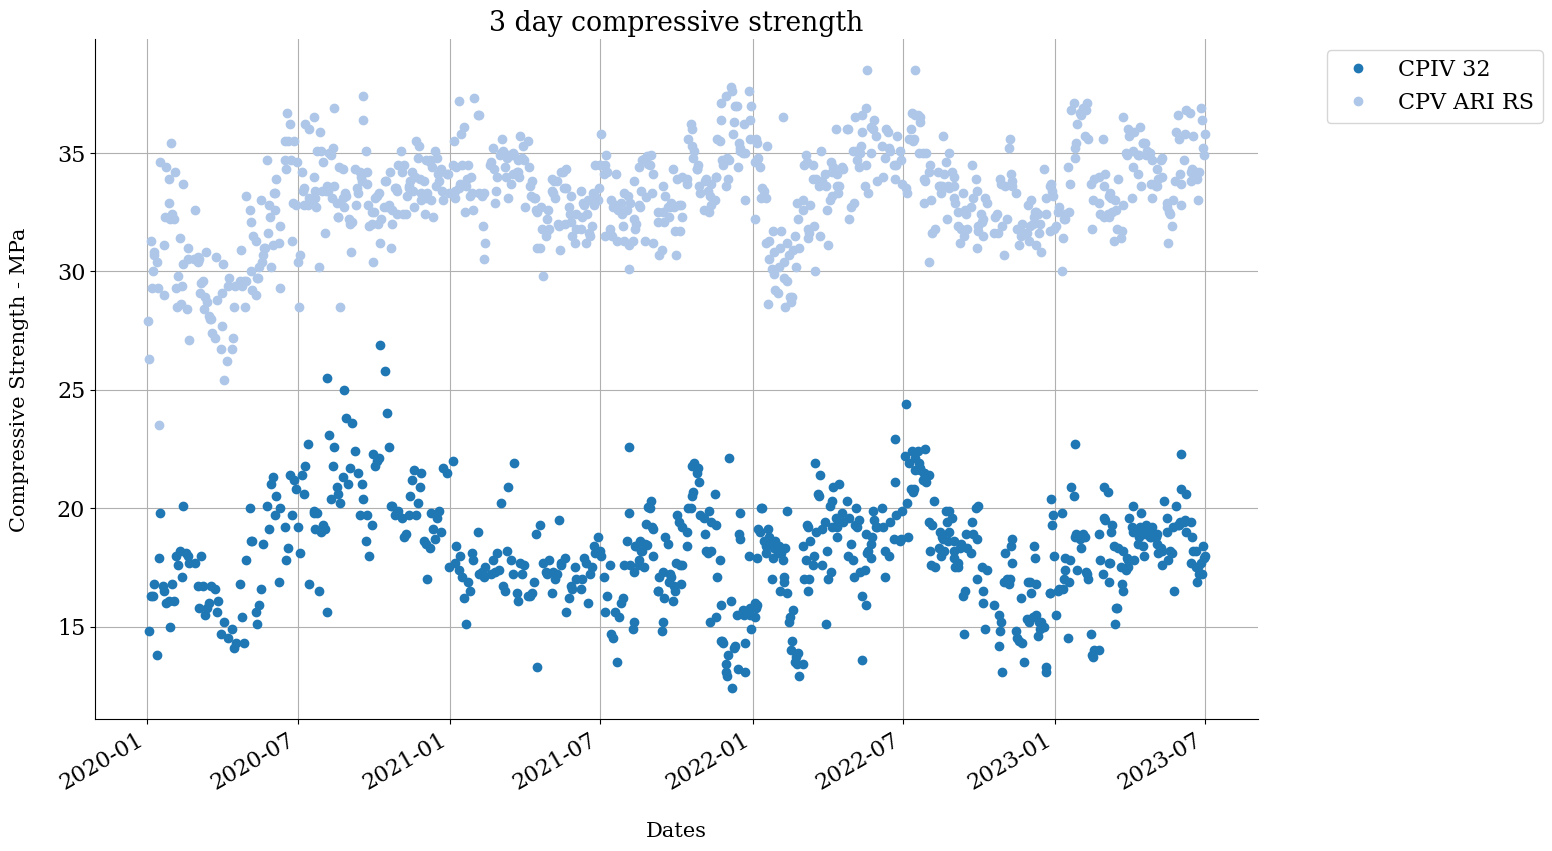

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

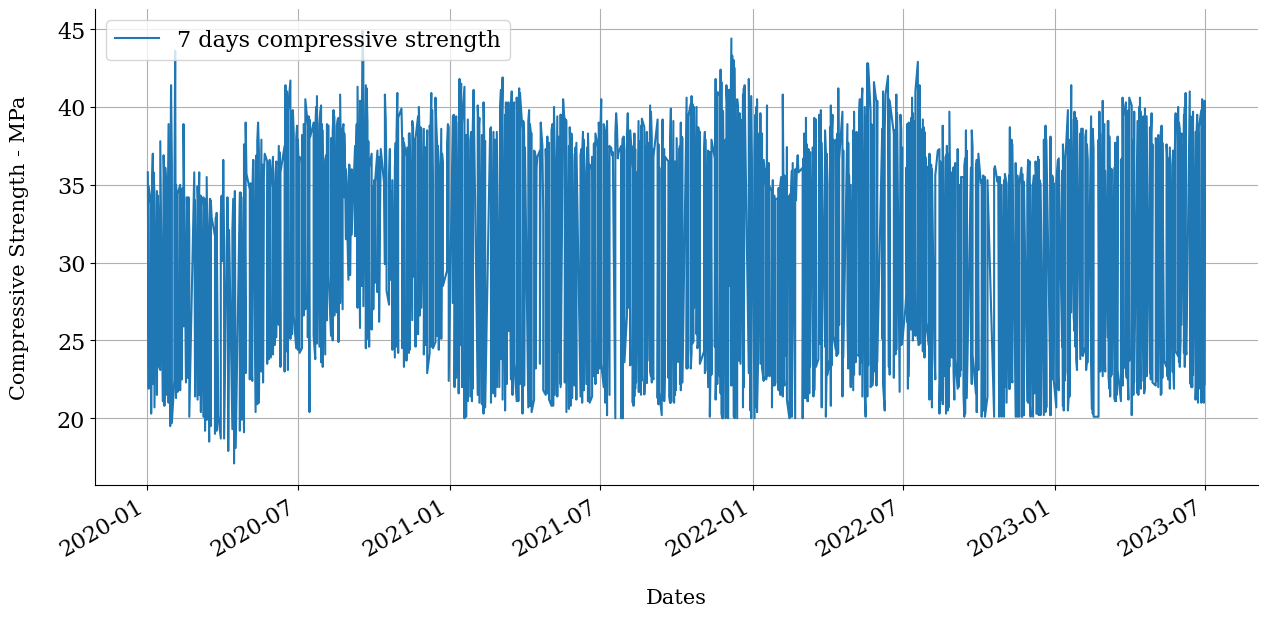

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

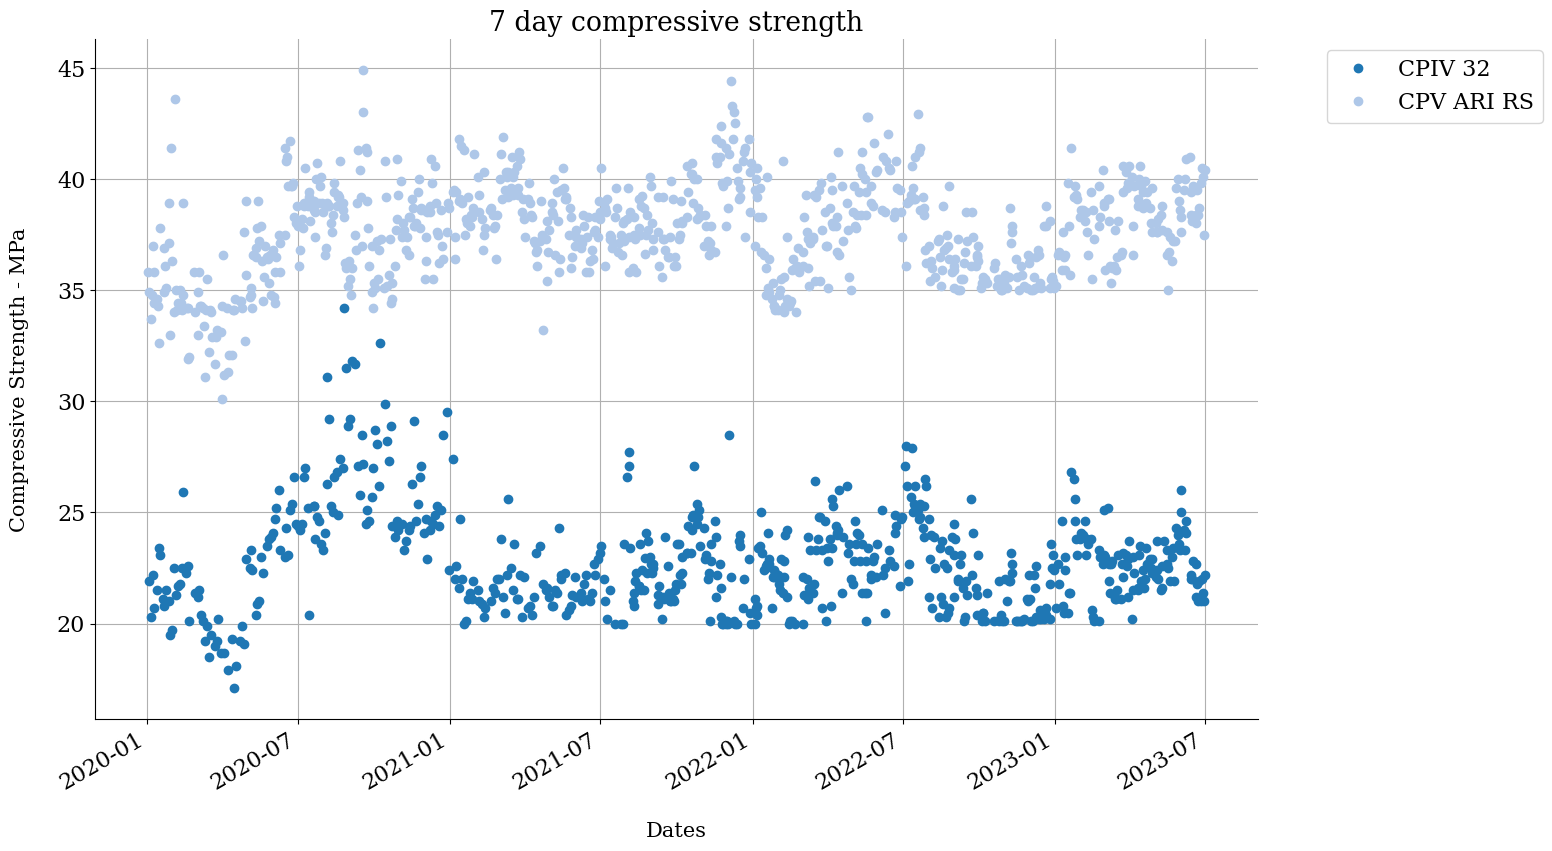

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

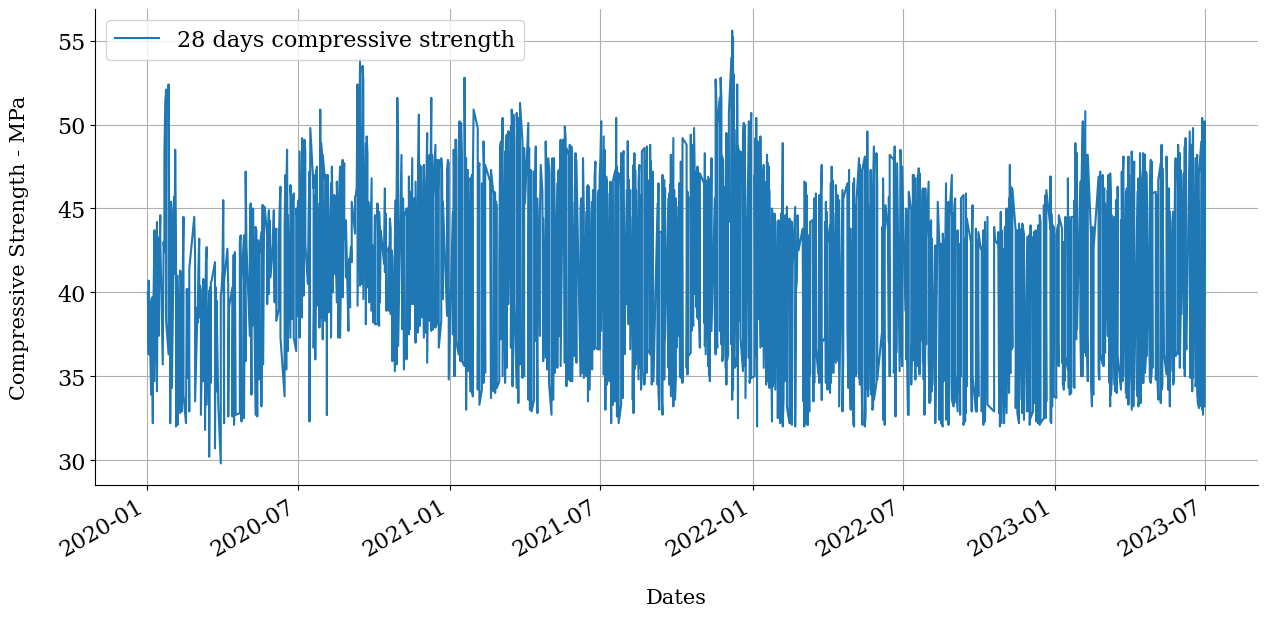

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

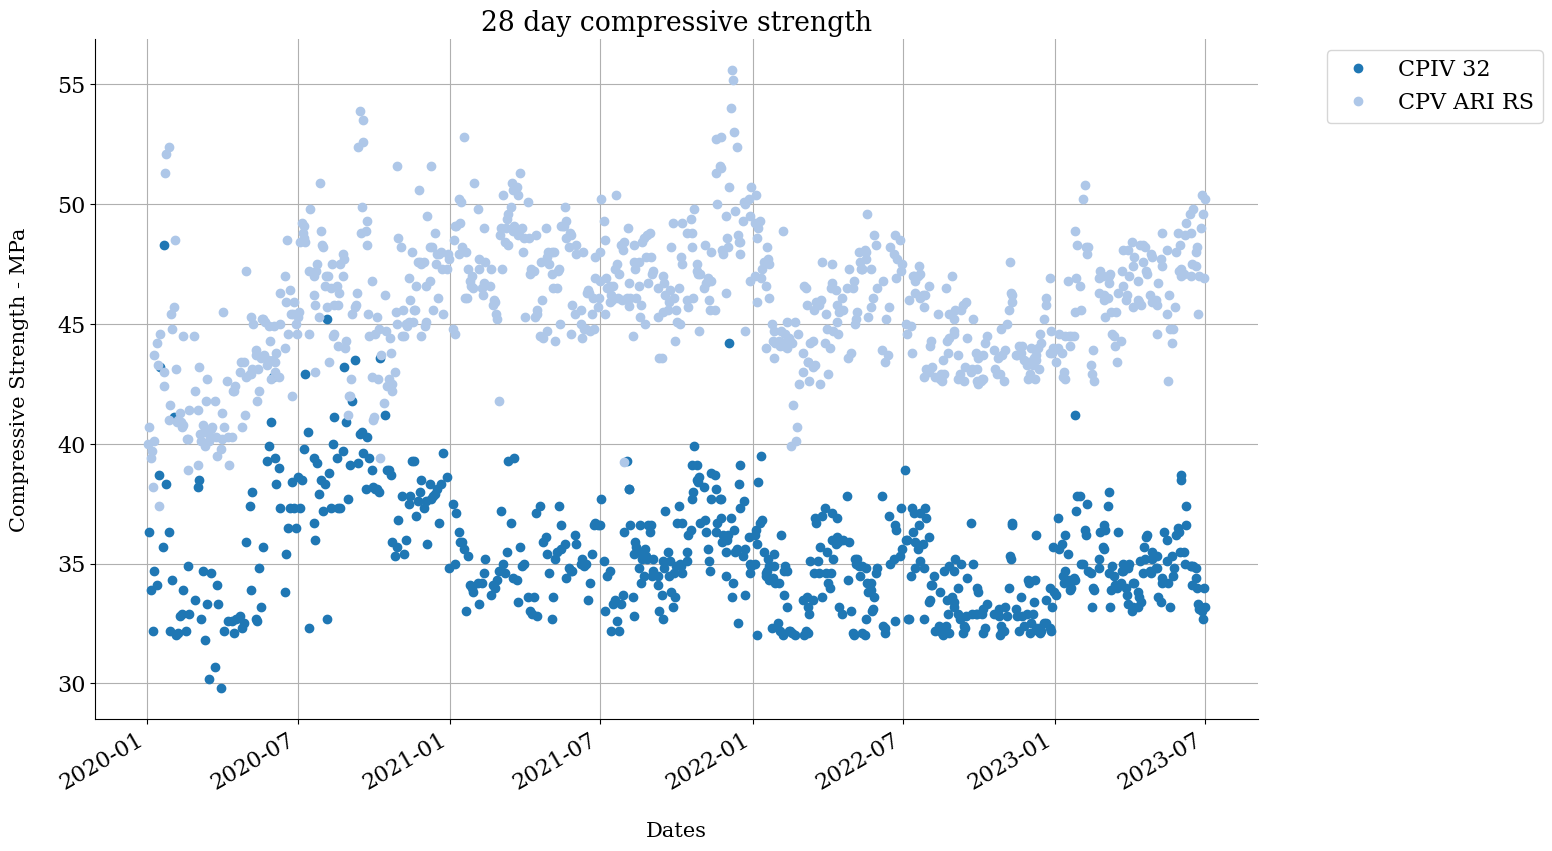

<IPython.core.display.Javascript object>

In [85]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()